# EDA

Бизнес задача:
- Наш заказчик : предприниматель, собирающийся выйти на американский рынок со своим риелторским агентством.
- Предметная область : рынок аренды недвижимости в США.
Датасет содержит информацию об объявлениях об аренде за 2018-2019 годы с ключевыми характеристиками объектов:

id - id пользователя в некотором хранилище данных с публиуациями о сдаче

category - вид жилья (апартаменты, condo, коммерческие пространства и др.)

amenities - предоставляемые удобства

bathrooms - кол-вл ванных комнат

bedrooms - кол-во спален

currency - валюта, в которой производится оплата

fee - есть/нет дополнительный взнос

has_photo - наличие и тип фотографий

pets_allowed - разрешённые питомцы

price	- стоимость проживания

price_display	- отображаемая стоимость в объявлении

price_type - периодичность оплаты

square_feet - площадь объекта (в кв. футах)

address - фактический адрес

cityname - город

state - штат (двухбуквенный код)

latitude - широта (геокоординаты)

longitude - долгота (геокоординаты)

source - платформа размещения

time - время публикации, посчитанное в формате Unix Timestamp (кол-во сек. прошедших с 1 янв. 1970 года)



#Преобразуем наши признаки, проанализируем дубликаты, заменим пропущеннные значения None в наших данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";",encoding='cp1252')
# создадим столбик с датой публикации в удобном формате
df['date'] = pd.to_datetime(df['time'], unit='s')
df = df.drop_duplicates()
df

del df['title']
del df['currency']
del df['price_display']
del df['price_type']

/tmp/ipython-input-1411556502.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";",encoding='cp1252')


In [ ]:
# анализируем и обрабатываем пропущенные/некорректные значения
df['amenities'] = df['amenities'].fillna('No amenities')
df['has_photo'].unique()
df['bathrooms'].unique()
df['bathrooms'] = df['bathrooms'].fillna('0.')
df.isna().sum()
df['bedrooms'].unique()
df = df[df['bedrooms'].notna()]
df = df[df['price'].notna()]
del(df['address'])
df['pets_allowed'] = df['pets_allowed'].fillna('No pets')

condition = df['latitude'].isna() & df['longitude'].isna() & df['cityname'].isna() & df['state'].isna()
df = df[df['latitude'].notna()]

df['cityname'] = df['cityname'].fillna('No inf')
df['state'] = df['state'].fillna('No inf')
df.isna().sum()

,0
id,0
category,0
body,0
amenities,0
bathrooms,0
bedrooms,0
fee,0
has_photo,0
pets_allowed,0
price,0


# Изучим подробнее типы сдачи жилья

Посмотрим доли типов сдачи жилья в датасете

В нашем датасете типы аренды имеют структуру housing/rent/... - третьим как раз указывает тип аренды.

Text(0.5, 1.0, 'Самые популярные типы аренды')

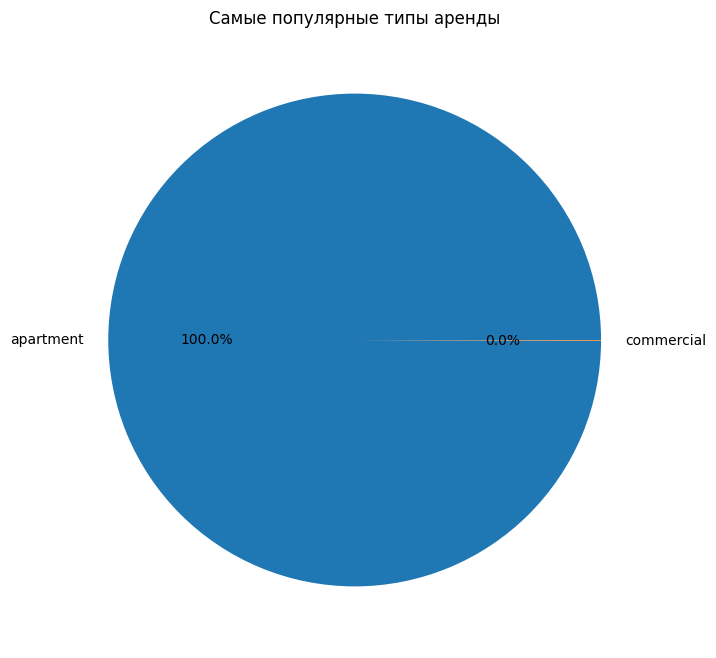

In [ ]:
import matplotlib.pyplot as plt
gf = df.copy()
gf['all_cat'] = gf['category'].str.split('/')
gf = gf.explode('all_cat')
gf=gf[(gf['all_cat']!= 'housing')& (gf['all_cat']!='rent')]
rating_data = gf.groupby("all_cat").size().sort_values(ascending=False).head(2)
plt.figure(figsize=(10, 8))
plt.pie(rating_data, labels=rating_data.index, autopct='%1.1f%%')
plt.title('Самые популярные типы аренды')


Рассмотрим распределение долей в этом мизерном проценте:

Commercial и retail находятся в одной категории - housing/rent/commercial/retail

Text(0.5, 1.0, 'Самые популярные типы аренды в малой части')

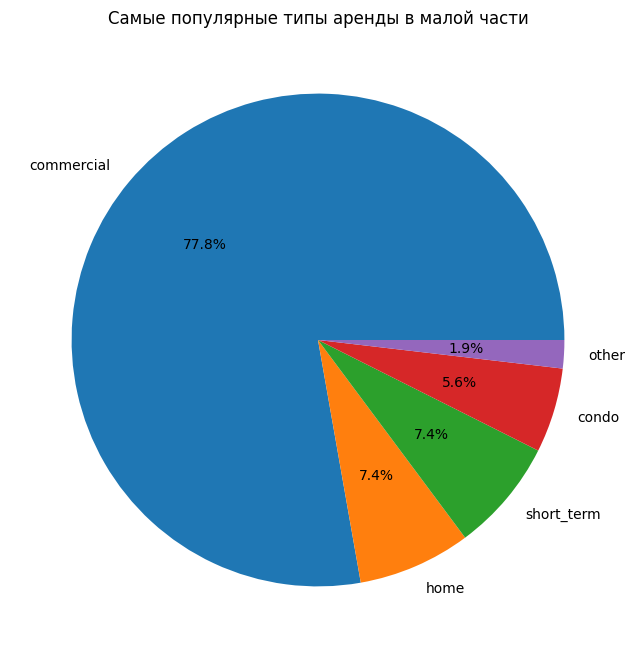

In [ ]:
import matplotlib.pyplot as plt

gf = df.copy()
gf['all_cat'] = gf['category'].str.split('/')
gf = gf.explode('all_cat')
gf = gf[(gf['all_cat']!= 'housing')& (gf['all_cat']!='rent')& (gf['all_cat']!='apartment')& (gf['all_cat']!='retail')]
rating_data = gf.groupby("all_cat").size().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 8))
plt.pie(rating_data, labels=rating_data.index, autopct='%1.1f%%')
plt.title('Самые популярные типы аренды в малой части')

Можем сделать вывод, что 99,9% процентов наших выборок это apartment, то есть сдача квартир под съем. Далее наиболее популярным является коммерческий тип аренды, однако он слишком мал, чтобы исследовать его.

# Изучим подробнее Amenities (удобства)

15993


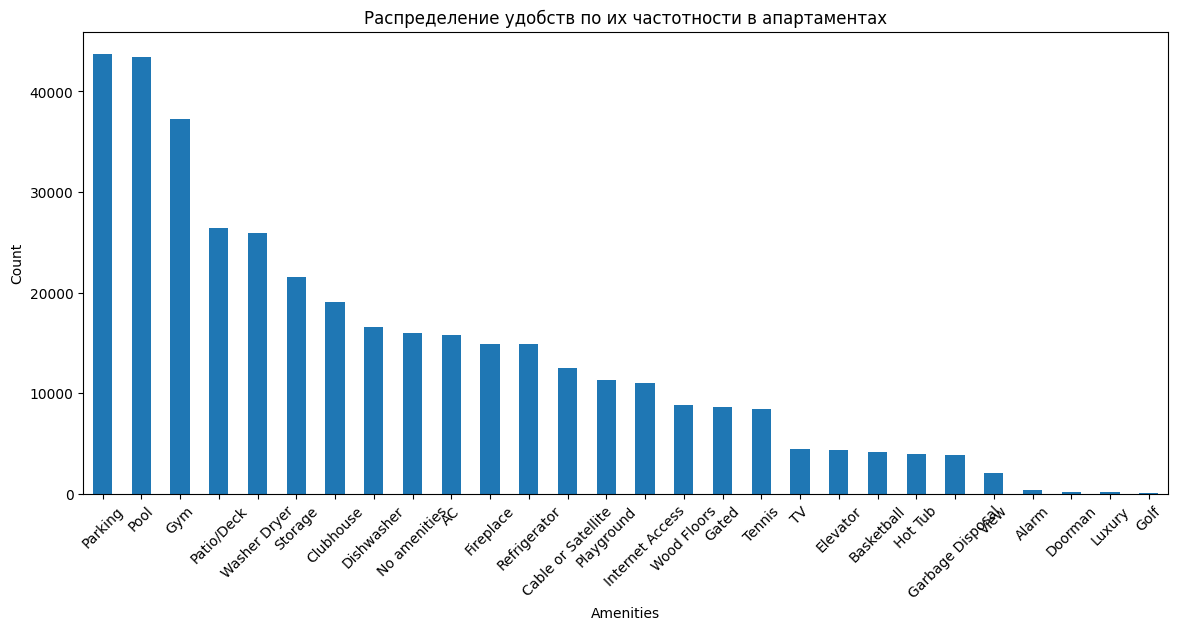

all_amenities
Parking               43729
Pool                  43425
Gym                   37227
Patio/Deck            26460
Washer Dryer          25922
Storage               21555
Clubhouse             19047
Dishwasher            16560
No amenities          15993
AC                    15731
Fireplace             14881
Refrigerator          14853
Cable or Satellite    12469
Playground            11309
Internet Access       11021
Wood Floors            8848
Gated                  8627
Tennis                 8464
TV                     4455
Elevator               4306
Basketball             4131
Hot Tub                3989
Garbage Disposal       3860
View                   2082
Alarm                   363
Doorman                 217
Luxury                  210
Golf                     27
Name: count, dtype: int64


In [ ]:
gf = df.copy()
print(len(gf[gf['amenities'] == 'No amenities']))

gf['all_amenities'] = gf['amenities'].str.split(', ')
gf['all_amenities'] = gf['amenities'].str.split(',')
gf = gf.explode('all_amenities')

plt.figure(figsize=(14, 6))
top_amenities = gf['all_amenities'].value_counts()

top_amenities.plot(kind='bar')
plt.title('Распределение удобств по их частотности в апартаментах')
plt.ylabel('Count')
plt.xlabel('Amenities')
plt.xticks(rotation=45)
plt.show()
print(top_amenities)

Анализ полноты данных показывает, что в 16% объявлений информация об удобствах отсутствует. Это может быть связано как с их фактическим отсутствием, так и с невнимательностью арендодателей при заполнении. Однако 84% объявлений содержат детализированную информацию об удобствах, что свидетельствует о высокой значимости данного параметра для конкуренции на рынке аренды


ТОП-5  удобств (по частоте упоминания):

- Парковка (43,729) — абсолютный must-have

- Бассейн (43,425) — почти равен парковке по важности

- Тренажерный зал (37,227) — стандарт для многоквартирных домов

- Патио/Терраса (26,460) — важное outdoor-пространство

- Стиральная машина+сушилка (25,922) — бытовая необходимость

Эти 5 удобств формируют базовый стандарт рынка

Также можно заметить, что кондиционер только на 8-м месте (15,731) — удивительно для жаркого климата США (может стать конкурентным бонусом)

Выводы о рынке:
- Высокая стандартизация: топ-3 удобства есть в более 50% объявлений

- Акцент на отдых и спорт (бассейн, тренажерный зал, теннис)

# Изучим подробнее платформы размещения объявлений

In [ ]:
df['source'].value_counts()

,count
source,
RentDigs.com,90709
RentLingo,6911
ListedBuy,564
GoSection8,434
RealRentals,268
tenantcloud,121
BostonApartments,93
RENTCafé,41
Listanza,28


RentDigs.com - cамая популряная платформа, на которой размещено наибольшее кол-во объявлений (примерно 90% от всех), поэтому рассмотрим следующие топ 10 по наполненности объявлениями

RentLingo - оказывается 2-ая по объёму размещений платформа (7к объявлений), кол-во предложений на других платформах распределено примерно одинаково мало.

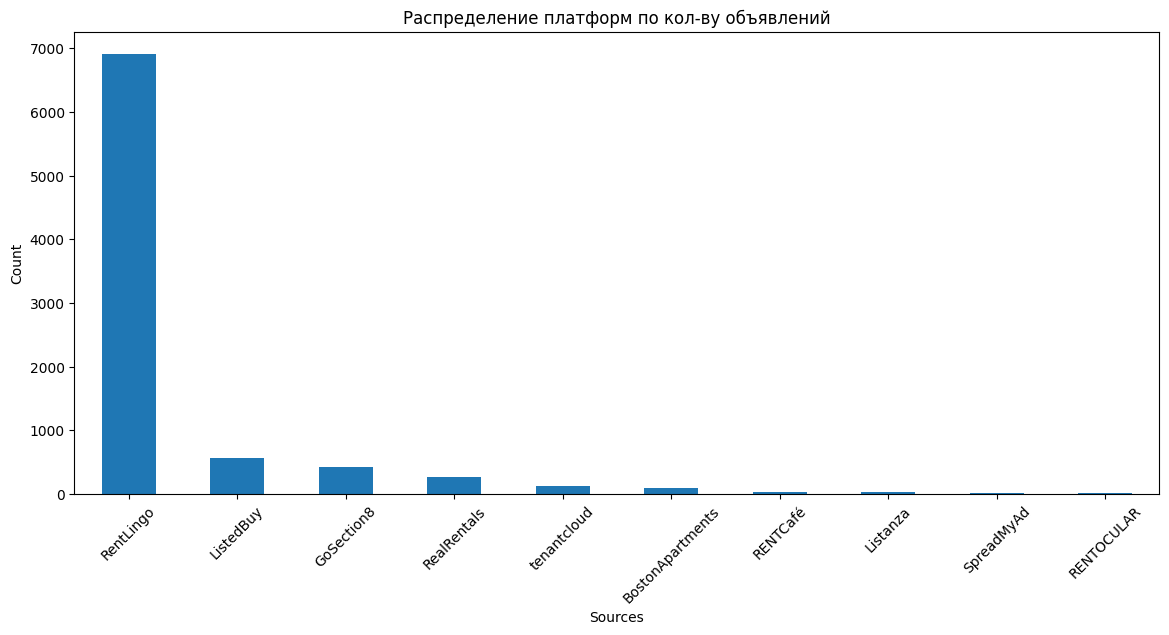

In [ ]:
gf1 = df.copy()

gf1['all_sources'] = gf1['source'].str.split(', ')
gf1['all_sources'] = gf1['source'].str.split(',')
gf1 = gf1.explode('all_sources')

plt.figure(figsize=(14, 6))
top_11 = gf1['all_sources'].value_counts().head(11)
top_10_except_first = top_11.iloc[1:]
top_10_except_first.plot(kind='bar')
plt.title('Распределение платформ по кол-ву объявлений')
plt.ylabel('Count')
plt.xlabel('Sources')
plt.xticks(rotation=45)
plt.show()


ВЫВОДЫ:

- RentDigs.com — это основной агрегатор или корпоративный источник данных, а не типичная платформа для размещения.
- RentLingo (6,911) — заметный игрок, но в 13 раз меньше

- ListedBuy (564) — уже нишевая платформа
- 22 платформы с < 50 объявлениями каждая.
Многие вероятно уже не существуют или очень локальны

# Изучим подробнее пользователей

- Тут далее можно посмотреть как-нибудь какие пользователи самые активные по размещению, сколько их, может быть это какие-то компании, в зависимости от кол-ва размещаемых предложений - короче надо посмотреть

In [ ]:
len(df['id'].unique())

99258

# Изучим подробнее ценовой аспект

In [ ]:
print(len(df[df['price'] > 3000]))
len(df[df['price'] > 6000])

4285


284

На следующем графике рассмотрим распределение цен в предложениях до 6000$, так как это основная масса объявлений. Более премиальных жилищ, то есть стоящих > 6000$ около 284, то есть примерно 0,025 от наших данных.

,0
id,750
category,750
body,750
amenities,750
bathrooms,750
bedrooms,750
fee,750
has_photo,750
pets_allowed,750
price,750


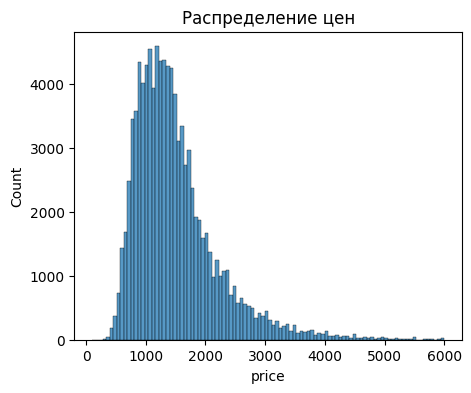

In [ ]:
gf2 = df.copy()
gf2 = gf2[gf2['price'] <= 6000]

plt.figure(figsize=(5, 4))
sns.histplot(data=gf2, x='price', bins=100);
plt.title("Распределение цен");
df[df['price'] > 4500].count()

- Основная концентрация – большинство значений находится в диапазоне 500–2500, с пиком около 1500.

- Распределение является правосторонне скошенным (положительная асимметрия), то есть большинство данных сосредоточено слева, а «хвост» тянется вправо.

Выводы:

- Рынок ориентирован на бюджетный сегмент – большая часть объектов имеет низкую или среднюю цену.

- Объявления стоимостью > 3000 можно определить как премиальные предложения, так как их достаточно немного (около 4% данных)

Рассмотрим отдельно премиум сегмент

In [ ]:
gf = df.copy()
gf = gf[gf['price']>3000].sort_values('price', ascending=False)
gf.shape

(4285, 18)

In [ ]:
top10 = gf[['state', 'price', 'latitude', 'longitude']].head(10)
top10

,state,price,latitude,longitude
6863,CA,52500.0,34.8870,-117.0350
40932,CA,40000.0,34.0584,-118.4135
28037,CA,35000.0,34.0939,-118.3801
40715,CA,35000.0,34.0939,-118.3801
17131,CA,35000.0,34.0939,-118.3801
45817,CA,33165.0,34.0504,-118.5362
38473,CA,32000.0,34.1176,-118.3327
14400,CO,30000.0,39.2111,-106.9359
35034,CA,29500.0,34.1176,-118.3327
31279,CA,29500.0,33.9943,-118.4620


вывод: В ТОП-10 самых дорогих предложений входят в основном объекты, находящиеся в Калифорнии

Далее рассмотрим подробнее
1. медианную арендную плату по штатам (более устойчива чем среднее из-за премиуального жилья и возможно небольшого кол-ва предложений в каких-то штатах)

2. кол-во объявлений по штатам за всё время

3. среднюю цену за кв. фут по штатам - может медианную лучше?

ВАЖНО:
Мы создадим столбец с целевой переменной — основной переменной при анализе недвижимости — ценой за квадратный фут.

Это ключевой этап подготовки данных, так как цена за квадратный метр является нормализованным показателем, который позволяет объективно сравнивать объекты недвижимости разной площади и стоимости.

In [ ]:
import plotly.express as px

states_stats = df.groupby('state').agg(
    avg_rent=('price', 'mean'),
    median_rent=('price', 'median'),
    count=('price', 'count'),
    avg_sqft=('square_feet', 'mean')).reset_index()

df['price_per_sqft'] = df['price'] / df['square_feet']
price_sqft = df.groupby('state')['price_per_sqft'].mean().reset_index()
states_stats = states_stats.merge(price_sqft, on='state')

info_stats_sorted = states_stats.sort_values('median_rent', ascending=False)

fig = px.bar(
    info_stats_sorted,
    x='state',
    y='median_rent',
    title='Медианная арендная плата по штатам',
    labels={'median_rent': 'Медианная цена ($)', 'state': 'Штат'},
    hover_data=['avg_rent', 'count', 'price_per_sqft'],
    color='count',
    color_continuous_scale='Blues',
    text='median_rent')

fig.update_traces(
    texttemplate='$%{text:.0f}',
    textposition='outside',
    hovertemplate=(
        '<b>%{x}</b><br>'
        'Медиана: <b>$%{y:.0f}</b><br>'
        'Средняя: $%{customdata[0]:.0f}<br>'
        'Цена/кв.фут: $%{customdata[2]:.2f}<br>'
        'Предложений: %{customdata[1]:,}'
        '<extra></extra>'))

fig.update_layout(
    xaxis_title="Штат",
    yaxis_title="Медианная цена ($)",
    coloraxis_colorbar_title="Количество",
    xaxis_tickangle=-45,
    width=1000,
    height=600)

fig.show()

In [ ]:
state_prices = df.groupby('state').agg(
    listings_count=('id', 'count')
).reset_index()
fig = px.choropleth(
    state_prices,
    locations='state',
    locationmode='USA-states',
    color='listings_count',
    scope='usa',
    color_continuous_scale='Blues',
    title='Количество объявлений об аренде по штатам США',
    labels={'listings_count': 'Количество объявлений'},
    hover_name='state',
)

fig.update_traces(
    hovertemplate=(
        '<b>%{hovertext}</b><br>' +
        'Объявлений: %{z}<br>'))

fig.show()

In [ ]:
import plotly.express as px

df['price_per_sqft'] = df['price'] / df['square_feet']
state_stats = df.groupby('state')['price_per_sqft'].mean().round(2).reset_index()

fig = px.choropleth(state_stats.sort_values('price_per_sqft', ascending=False),
                    locations='state', locationmode='USA-states',
                    color='price_per_sqft', scope='usa',
                    title='Цена аренды за квадратный фут по штатам',
                    labels={'price_per_sqft': '$/кв.фут'})
fig.show()

In [ ]:
import plotly.express as px
df['price_sqft'] = df['price'] / df['square_feet']
gf = df.copy()
filtered = gf[gf['price_sqft'] > 2.5]
state_stats = filtered.groupby('state')['price_per_sqft'].mean().round(2).reset_index()

fig = px.choropleth(state_stats.sort_values('price_per_sqft', ascending=False),
                    locations='state', locationmode='USA-states',
                    color='price_per_sqft', scope='usa',
                    title='Цена аренды за квадратный фут по штатам',
                    labels={'price_per_sqft': '$/кв.фут'})
fig.show()

# Изучим подробнее размеры (площади) жилья

На следующем графике рассмотрим распределение площадей жилья в предложениях до 4000 кв.м., так как это основная масса объявлений. Более больших по размеру жилищ, то есть апартов с площадью > 4000 кв.м. около 1000, то есть примерно 1% от наших данных

,0
id,1251
category,1251
body,1251
amenities,1251
bathrooms,1251
bedrooms,1251
fee,1251
has_photo,1251
pets_allowed,1251
price,1251


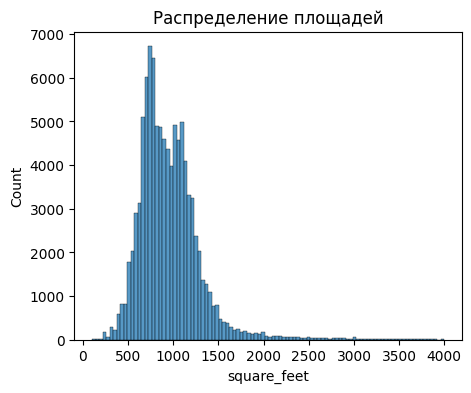

In [ ]:
gf2 = df.copy()
gf2 = gf2[gf2['square_feet'] <= 4000]

plt.figure(figsize=(5, 4))
sns.histplot(data=gf2, x='square_feet', bins=100);
plt.title("Распределение площадей");
df[df['price'] > 4000].count()

ВЫВОД:
- Распределение – явное правостороннее смещение (положительная асимметрия). Большинство объектов имеют относительно небольшую площадь.

- Пик частоты – максимальное количество объектов сосредоточено в интервале 500–1000 кв. футов. Скорее всего рынок сфокусирован на компактном жилье среднего размера (не студии, но и не большие квартиры).

- Выбросы – небольшое количество объектов имеет площадь более 2000 кв. футов (≈ 185 м²), вплоть до 4000 кв. футов, что может соответствовать элитному или коммерческому сегменту.

# Изучим подробнее питомцев, разрешённых при проживании

In [ ]:
df['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', 'No pets', 'Dogs', 'Cats,Dogs,None'],
      dtype=object)

У нас есть сомнительная неоднозначная колонка cats, dogs, none. В body скорее всего будет описание отношения к животным у арендодателя

In [ ]:
df1111=df[df['pets_allowed']=='Cats,Dogs,None']
df1111

,id,category,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,date,price_per_sqft,price_sqft
83369,5168200637,housing/rent/apartment,xxxxxxxxxx.xxx Listing ID xxx-xxx-xxxx. AVAILA...,No amenities,1.0,1.0,No,Thumbnail,"Cats,Dogs,None",930.0,720,Saint Paul,MN,44.8935,-93.1084,RealRentals,1548536317,2019-01-26 20:58:37,1.291667,1.291667


In [ ]:
print(df1111['body'].values[0])

xxxxxxxxxx.xxx Listing ID xxx-xxx-xxxx. AVAILABLE NOW OR March first Large one Beds (720 sq-ft) Apartments in Peaceful Residential Neighborhood Small eleven Unit Building On Site Laundry (NO CHARGE!) We Love Cats! NO PET FEE or PET DEPOSIT! Near Busline Carpeting/H... List ID: 551889395 | RealRentals.com


Итак, действительно "We Love Cats! NO PET FEE or PET DEPOSIT!" это была лишь ошибка в данных, эту квартиру можно отнести к категории pet-friendly. Тогда рассмотрим долю pet-frinedly квартир и no-pets. Также это объявлние из штата MN, который мы не рассматриваем

Text(0.5, 1.0, 'Доля аренд доступных для животных')

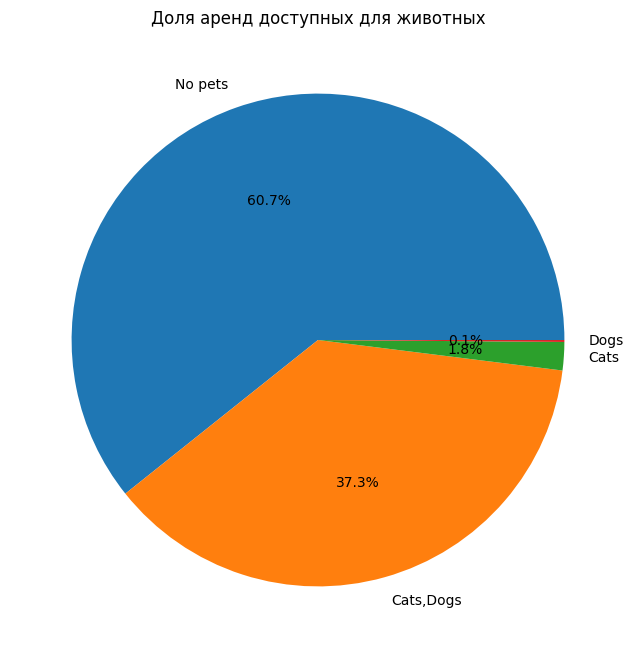

In [ ]:
df1=df.copy()
import matplotlib.pyplot as plt
df1['pets_allowed'] = df1['pets_allowed'].replace('Cats,Dogs,None', 'Cats')
rating_data = df1.groupby("pets_allowed").size().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.pie(rating_data, labels=rating_data.index, autopct='%1.1f%%')
plt.title('Доля аренд доступных для животных')

# Рассмотрим подробнее территориальное расположение объектов

Далее рассмотрим поподробнее территориальное распределение наших предложений (обязательно тут должен быть график который с помощью широты и долготы сопоставит - этот код с какого-то семинара)

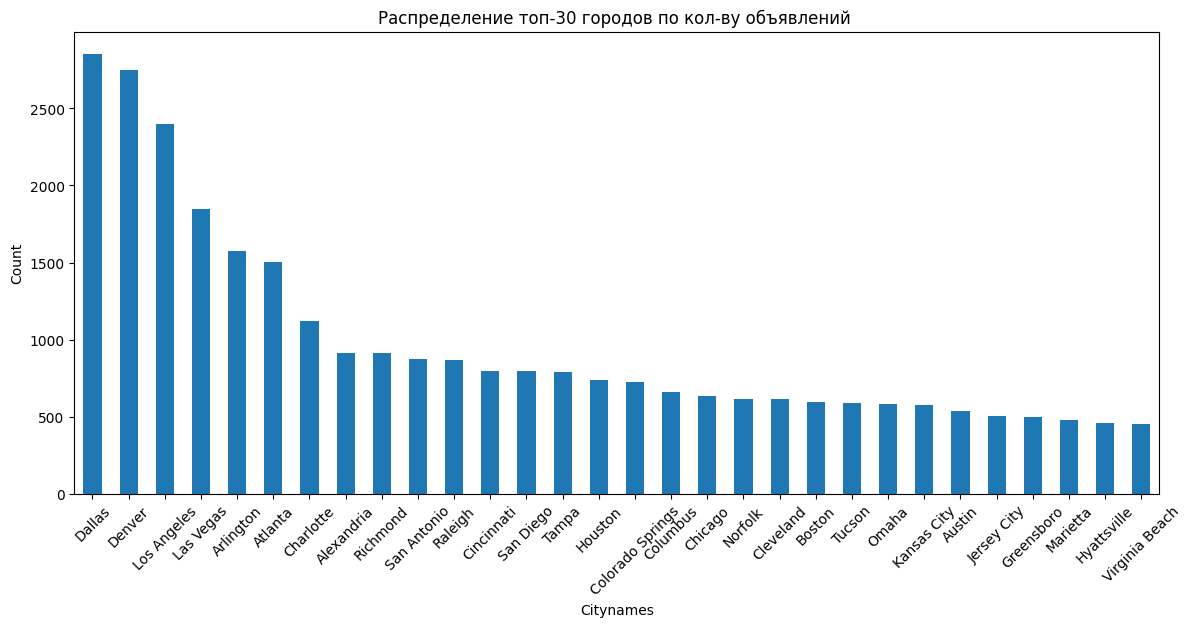

cityname
Dallas              2853
Denver              2749
Los Angeles         2398
Las Vegas           1844
Arlington           1577
Atlanta             1504
Charlotte           1122
Alexandria           914
Richmond             913
San Antonio          873
Raleigh              865
Cincinnati           798
San Diego            794
Tampa                788
Houston              739
Colorado Springs     723
Columbus             663
Chicago              633
Norfolk              618
Cleveland            616
Boston               598
Tucson               587
Omaha                584
Kansas City          574
Austin               535
Jersey City          505
Greensboro           498
Marietta             481
Hyattsville          459
Virginia Beach       452
Name: count, dtype: int64


In [ ]:
gf = df.copy()

plt.figure(figsize=(14, 6))
top_amenities = gf['cityname'].value_counts().head(30)

top_amenities.plot(kind='bar')
plt.title('Распределение топ-30 городов по кол-ву объявлений ')
plt.ylabel('Count')
plt.xlabel('Citynames')
plt.xticks(rotation=45)
plt.show()
print(top_amenities)

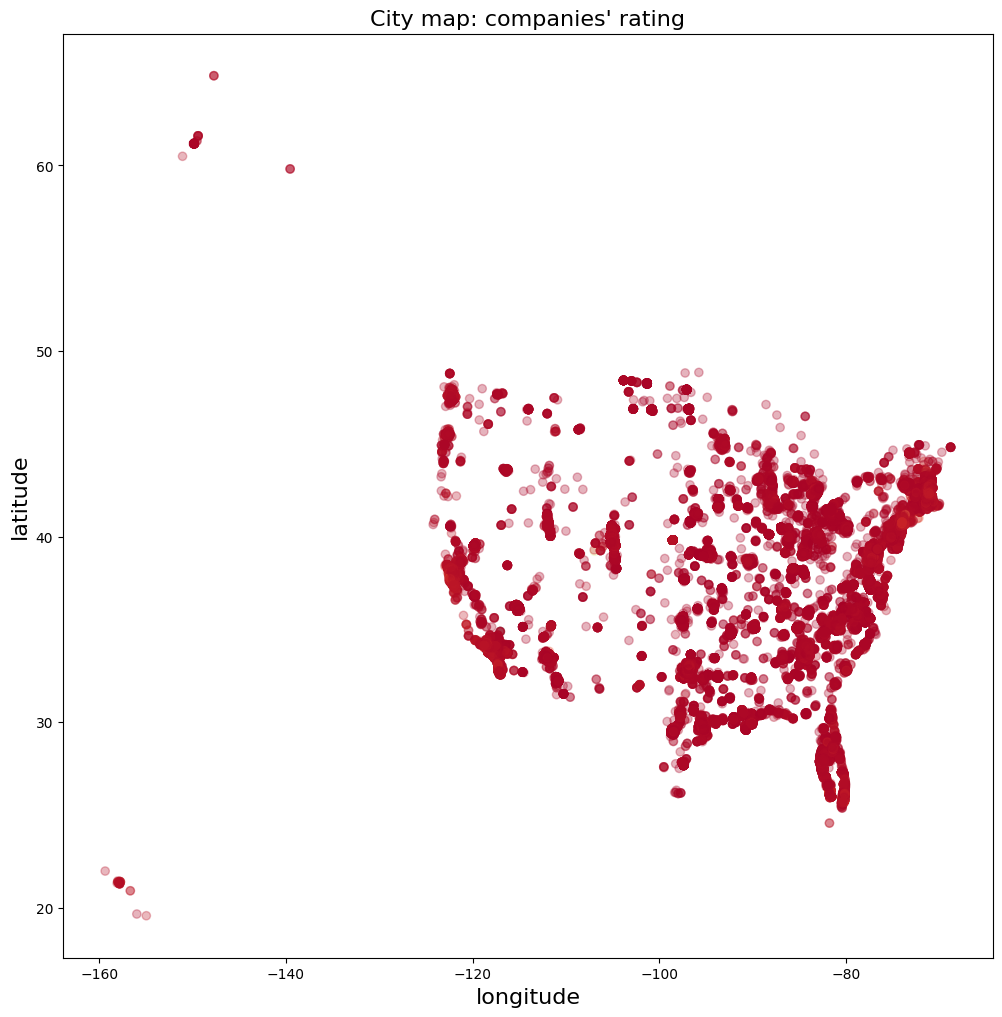

In [ ]:
plt.figure(figsize=(12, 12))
x = df['longitude']
y = df['latitude']
plt.scatter(x, y, alpha=0.3, c = df['price'], cmap = 'RdYlGn')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City map: companies\' rating', fontsize=16)
plt.show()

Лидеры:

- Dallas (2853) и Denver (2749) – явные лидеры, что может указывать на активный рынок недвижимости в этих городах (быстрый рост населения, экономическая активность, развитая инфраструктура).

- Los Angeles (2398) – ожидаемо в топе из-за размеров агломерации, однако что уступает Далласу и Денверу в этих данных (интересно конечно why).

Региональная концентрация:

- Сильно представлены Техас (Dallas, San Antonio, Houston, Austin), Колорадо (Denver, Colorado Springs), Вирджиния (Arlington, Alexandria, Richmond, Norfolk, Virginia Beach).

- Также заметна Флорида (Tampa) и Северная Каролина (Charlotte, Raleigh, Greensboro).



# Новый признак - удаленность от центра города

Штат Калифорния, по предварительному анализу, один из самых популярных (по количеству объявлений) штатов. Будем проводить дальнейший анализ в рамках него, но в нем 2978 городов, мы не будем рассматривать все, поэтому возьмем три самых популярных (по количеству объявлений).

In [ ]:
print(df['cityname'].nunique())
df['$/sq'] = df['price'] / (df['square_feet'])
gf = df[df['state'] == 'CA']
df[df['state'] == 'CA']['cityname'].nunique()
top_10_cities_by_count = gf["cityname"].value_counts().head(10)
print(top_10_cities_by_count)

2978
cityname
Los Angeles      2398
San Diego         793
Irvine            448
Pasadena          371
Long Beach        365
Sacramento        323
Riverside         215
Santa Monica      159
San Francisco     133
Moreno Valley     126
Name: count, dtype: int64



Создаем новый признак - расстояние от центра города. Центр города не географический, а экономический или административный, потому что так будет правильней. И чтобы не мучаться с математикой - переводом координат, вычислением через радианы, формулами, используем специальную библиотеку.

In [ ]:
from geopy.distance import geodesic #используем эту библиотеку для вычисления расстояния между координатами кв и центра города
centres = {
    "Los Angeles": (34.053690, -118.242767),
    "San Diego":   (32.715736, -117.161087),
    "Irvine":      (33.685696, -117.825981),
}


def centre_distance(row):
    city = row["cityname"]
    if city not in centres:
        return np.nan
    apt_coords = (row["latitude"], row["longitude"])
    center_coords = centres[city]
    return geodesic(apt_coords, center_coords).km


gf["centre_dist"] = df.apply(centre_distance, axis=1)

/tmp/ipython-input-1384537073.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Смотрим корреляционную матрицу по четырем признакам для всей Калифорния

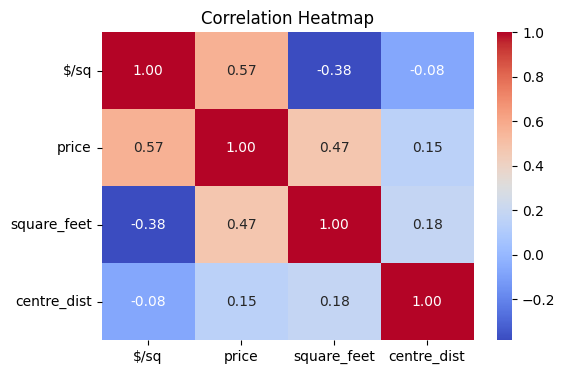

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_features = ["$/sq", "price", "square_feet", "centre_dist"]
corr_matrix = gf[corr_features].corr(method = 'spearman')
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Посмотрим теперь ту же матрицу, но для четырех самых популярных городов Калифорниии

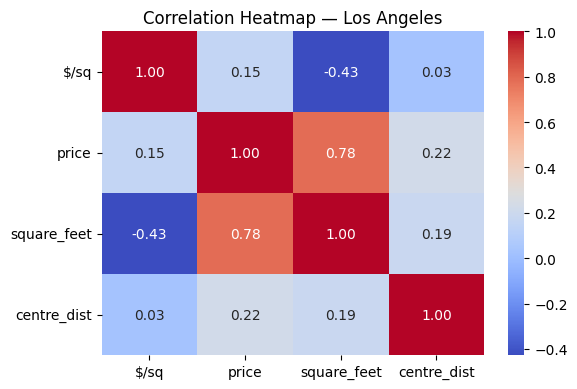

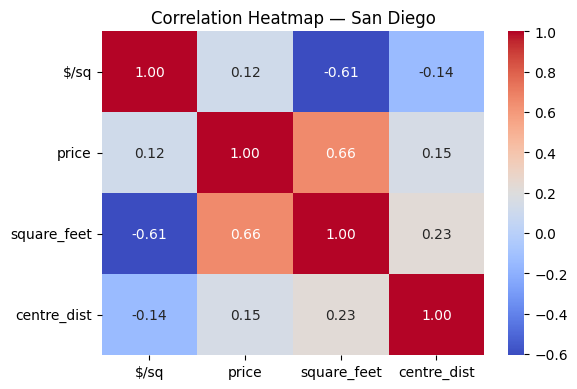

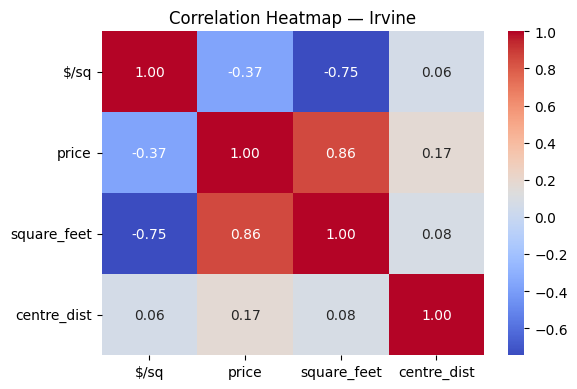

In [ ]:
cities = ["Los Angeles", "San Diego", "Irvine"]
features = ["$/sq", "price", "square_feet", "centre_dist"]
for city in cities:
    subset = gf[gf["cityname"] == city][features]
    corr_matrix = subset.corr(method = 'spearman')
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap — {city}")
    plt.tight_layout()
    plt.show()

Теперь посмотрим три самых популярных города в штате Техас и корреляционную матрицу для них

In [ ]:
sf = df[df['state'] == 'TX']
top_10_cities_by_count = sf["cityname"].value_counts().head(10)
print(top_10_cities_by_count)

cityname
Dallas            2821
San Antonio        873
Houston            739
Arlington          622
Austin             535
Plano              394
Irving             357
Euless             285
Corpus Christi     258
Richardson         245
Name: count, dtype: int64


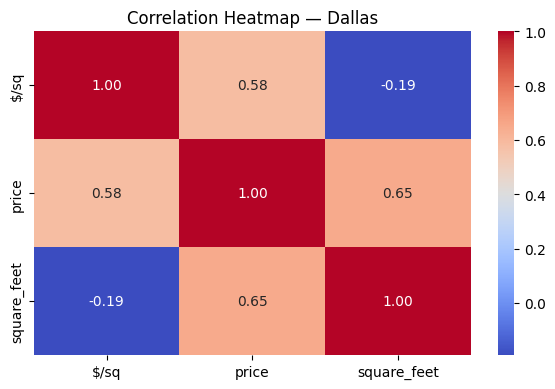

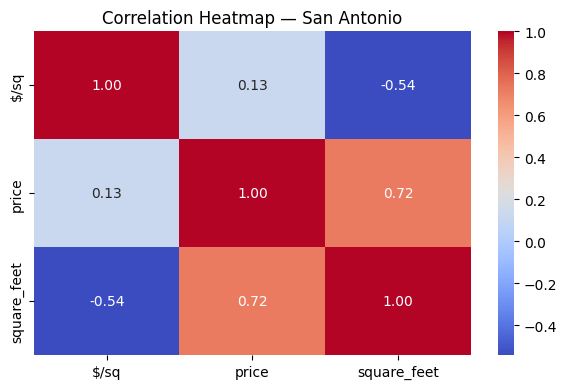

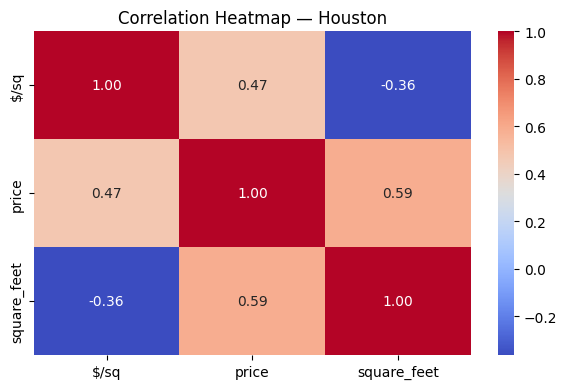

In [ ]:
cities = ["Dallas", "San Antonio", "Houston"]
features = ["$/sq", "price", "square_feet"]
for city in cities:
    subset = sf[sf["cityname"] == city]
    corr_matrix = subset[features].corr(method = 'spearman')
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap — {city}")
    plt.tight_layout()
    plt.show()

In [ ]:
from geopy.distance import geodesic #используем эту библиотеку для вычисления расстояния между координатами кв и центра города
nf = df[df['state'] == 'NY']

def centre_distance(row):
    apt_coords = (row["latitude"], row["longitude"])
    center_coords = (40.7143, -74.0060)
    return geodesic(apt_coords, center_coords).km


nf["centre_dist"] = nf.apply(centre_distance, axis=1)

/tmp/ipython-input-992897440.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



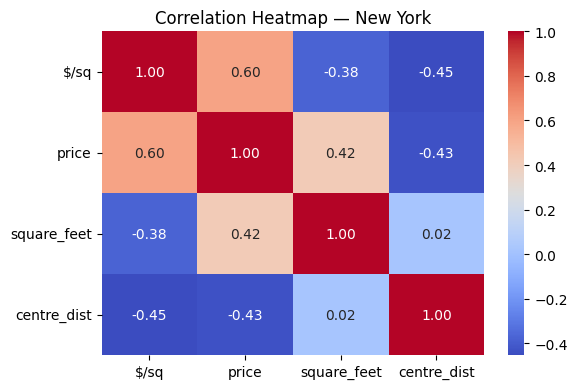

In [ ]:
cities = ["New York"]
features = ["$/sq", "price", "square_feet", "centre_dist"]
for city in cities:
    subset = nf[nf["cityname"] == city][features]
    corr_matrix = subset.corr(method = 'spearman')
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap — {city}")
    plt.tight_layout()
    plt.show()

В ходе дальнейшего анализа было выявлено, что датасет был некорректно сформирован, а конкретно признаки "latitude", "longitude", отвечающие за координаты жилья. Из-за этого удаленность от центра получается тоже некорректной. На общем графике США и даже отдельного штата это не видно, но если брать отдельный город, то это становится очевидно.

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 48 to 98926
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              897 non-null    int64         
 1   category        897 non-null    object        
 2   body            897 non-null    object        
 3   amenities       897 non-null    object        
 4   bathrooms       897 non-null    object        
 5   bedrooms        897 non-null    float64       
 6   fee             897 non-null    object        
 7   has_photo       897 non-null    object        
 8   pets_allowed    897 non-null    object        
 9   price           897 non-null    float64       
 10  square_feet     897 non-null    int64         
 11  cityname        897 non-null    object        
 12  state           897 non-null    object        
 13  latitude        897 non-null    float64       
 14  longitude       897 non-null    float64       
 15  source  

Text(0.5, 1.0, 'Расположение жилья в Арлингтоне (топ-3 в штате Вирджиния)')

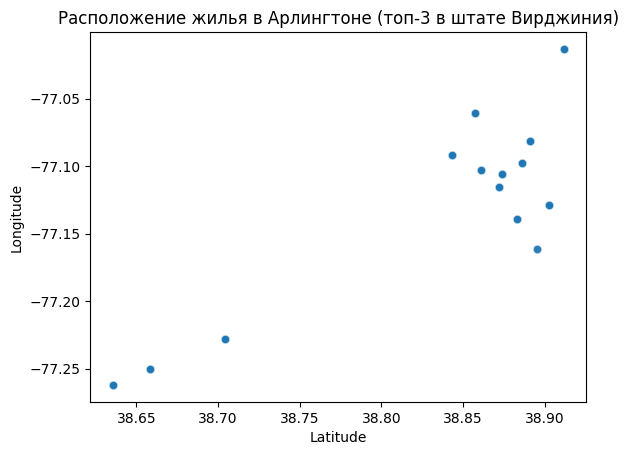

In [ ]:
vf = df[df['state'] == 'VA'].copy()
plt.scatter(vf[vf['cityname'] == 'Arlington']['latitude'], vf[vf['cityname'] == 'Arlington']['longitude'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
vf[vf['cityname'] == 'Arlington'].info()
plt.title('Расположение жилья в Арлингтоне (топ-3 в штате Вирджиния)')

# Корреляции

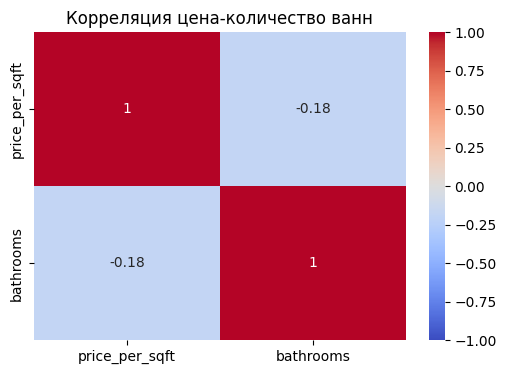

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[['price_per_sqft', 'bathrooms']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция цена-количество ванн')
plt.show()

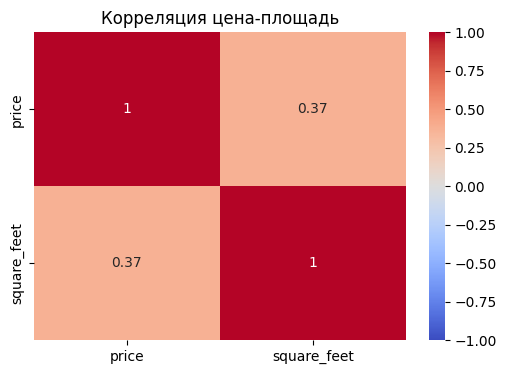

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[['price', 'square_feet']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция цена-площадь')
plt.show()

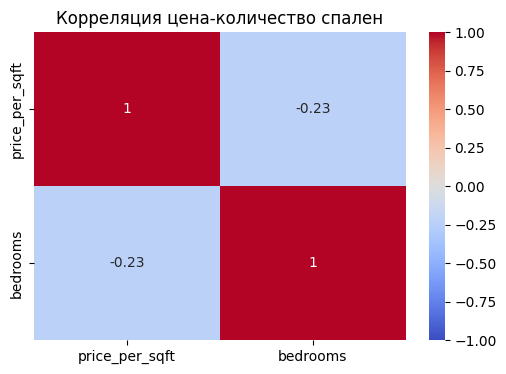

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[['price_per_sqft', 'bedrooms']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция цена-количество спален')
plt.show()

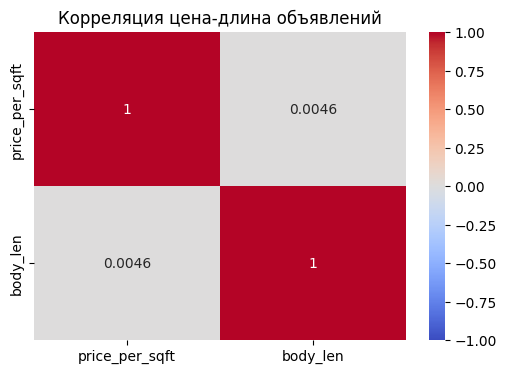

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['body_len'] = df['body'].str.len()
corr_matrix = df[['price_per_sqft', 'body_len']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция цена-длина объявлений')
plt.show()

#Аренда с fee

У нас есть примерно 300 объявлений, где присутствует fee - налог сверху.

Рассмотрим какие удобства распространены в квартирах с дополнительным сбором:

/tmp/ipython-input-3031150014.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



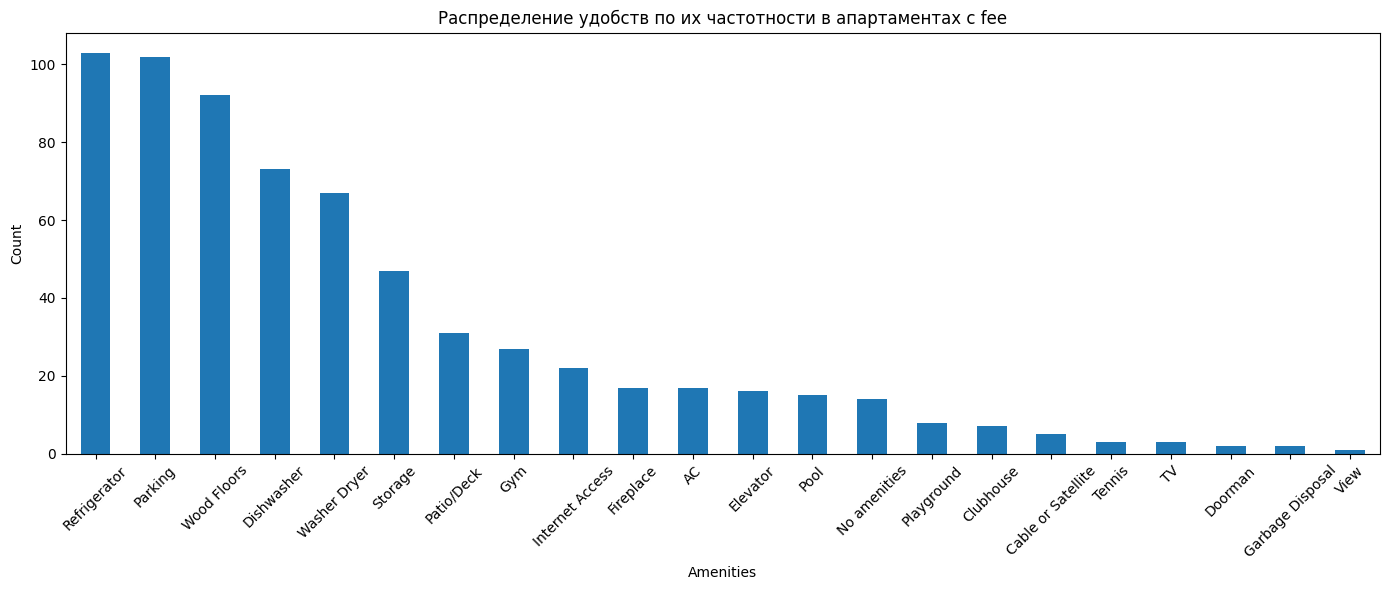

In [ ]:
zf=df[df['fee']=="Yes"]
zf['all_amenities'] = zf['amenities'].str.split(',')
zf = zf.explode('all_amenities')

plt.figure(figsize=(14, 6))
top_amenities = zf['all_amenities'].value_counts()

top_amenities.plot(kind='bar')
plt.title('Распределение удобств по их частотности в апартаментах с fee')
plt.ylabel('Count')
plt.xlabel('Amenities')
plt.xticks(rotation=45)
plt.show()

Мы видим, что эти квартиры не имеют каких-то уникальных "люксовых" удобств. Значит налогообложение связано с какими-то другими характеристиками. Посмотрим в каких штатах больше всего объявлений с дополнительным сбором:

Text(0.5, 1.0, 'Жилье с доп налогом по штатам')

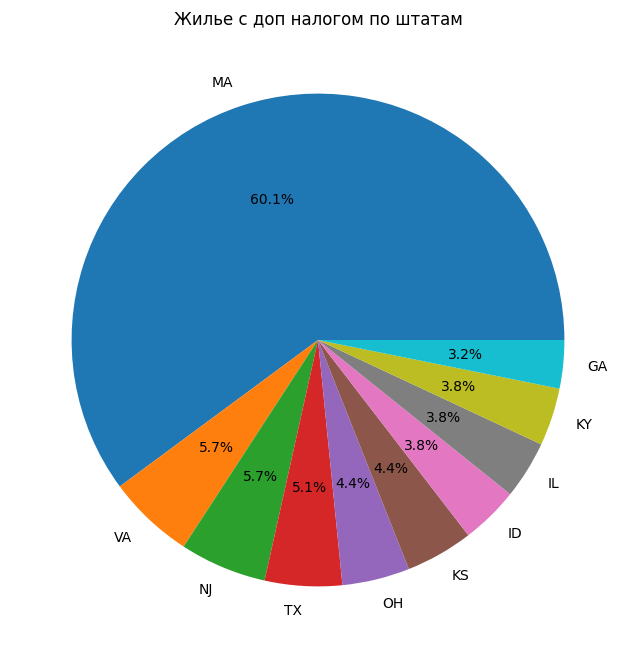

In [ ]:
zf=df[df['fee']=="Yes"]
import matplotlib.pyplot as plt
rating_data = zf.groupby("state").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
plt.pie(rating_data, labels=rating_data.index, autopct='%1.1f%%')
plt.title('Жилье с доп налогом по штатам')

Далее рассмотрим по ресурсам, на которых выложенны данные объявления

Text(0.5, 1.0, 'Жилье с доп налогом по источникам')

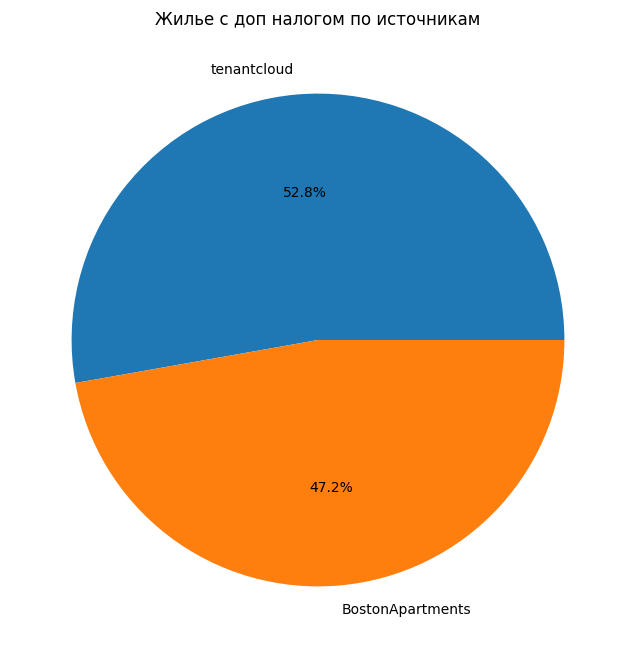

In [ ]:
zf=df[df['fee']=="Yes"]
import matplotlib.pyplot as plt
rating_data = zf.groupby("source").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
plt.pie(rating_data, labels=rating_data.index, autopct='%1.1f%%')
plt.title('Жилье с доп налогом по источникам')

Итак, в основном это жилье в МА - в этом штате находится университет MIT. По компаниям только BostonApartments и tenantcloud имеют fee сбор.

# TEXAS VS CALIFORNIA

Рассмотрим распределение цены и цены за квадратный метр в Калифорнии и Техасе

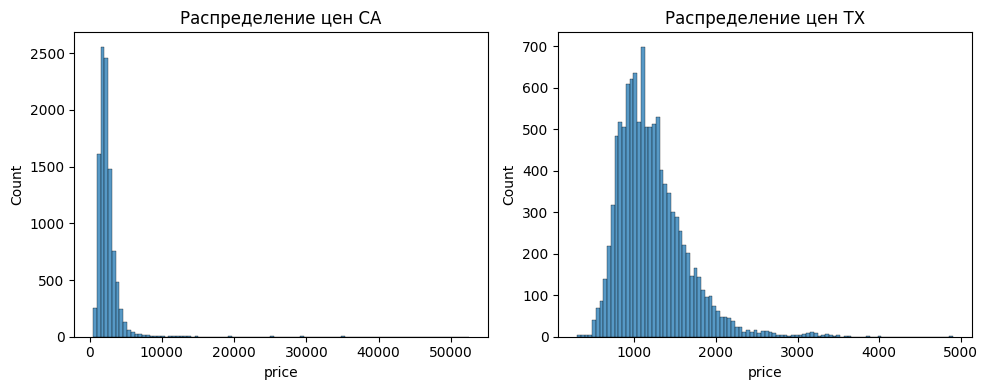

In [ ]:
cadf = df[df['state'] =='CA']
txdf = df[df['state'] =='TX']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=cadf, x='price', bins=100, ax=ax1).set_title("Распределение цен CA")
sns.histplot(data=txdf, x='price', bins=100, ax=ax2).set_title("Распределение цен TX")

plt.tight_layout()

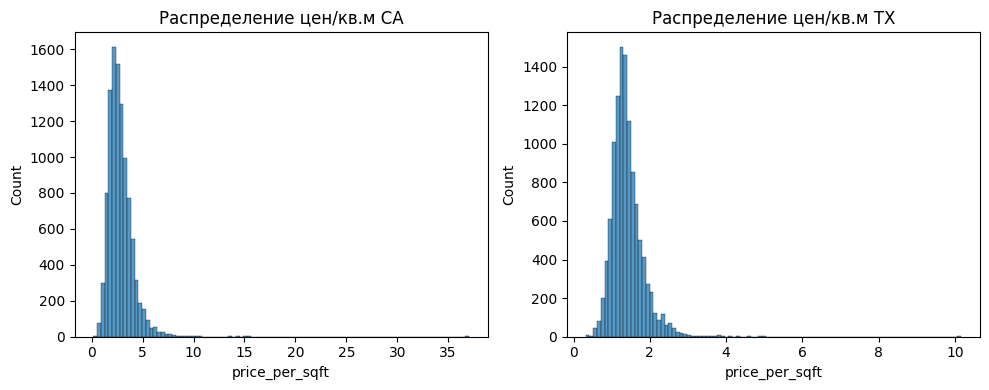

In [ ]:
cadf1 = df[df['state'] =='CA']
txdf1 = df[df['state'] =='TX']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=cadf1, x='price_per_sqft', bins=100, ax=ax1).set_title("Распределение цен/кв.м CA")
sns.histplot(data=txdf1, x='price_per_sqft', bins=100, ax=ax2).set_title("Распределение цен/кв.м TX")

plt.tight_layout()

Посмотрим на дисперсию, стандарное отклонение и коэффицент вариации

In [ ]:
print(cadf['price_per_sqft'].var())
print(txdf['price_per_sqft'].var())
print(cadf['price_per_sqft'].std())
print(txdf['price_per_sqft'].std())
print(cadf['price_per_sqft'].std() / cadf['price_per_sqft'].mean())
print(txdf['price_per_sqft'].std() / txdf['price_per_sqft'].mean())



1.435395226068829
0.1647878053455105
1.1980798078879507
0.4059406426381947
0.42847360291495173
0.2900004482872987


Можем заметить, что показатели сильно различаются. Стандартное отклонение в цены за квадратный метр в Кадифорнии в три раза больше чем в Техасе. Это может говорить о том, что в Техасе рынок более стандартизирован, то есть цена за квадратный метр более стабильна. В то время как в Калифорнии на цену влияет больше факторов, например расположение, удобства, престижность. Для риелторской компании "легче" будет выйти именно на рынок Техаса, поскольку он более предсказуем и лучше поддается анализу. Для изучения рынка Калифорнии был бы необходим локальный эксперт/более тщательное изучение местного рынка.

Таким образом мы можем выявить гипотезу:

# Гипотеза про стандартизированный рынок

H0: дисперсии цены за квадратный метр у Техаса и Калифорнии одинаковые

H1: дисперсии цены за квадратный метр у Техаса и Калифорнии различаются

Рассмотрим наше распределение для Калифорнии

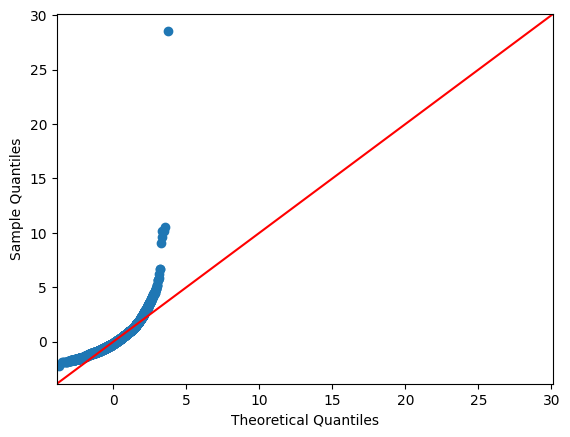

In [ ]:
from statsmodels.api import qqplot
dfgip=df[df['state']=='CA']
qqplot(dfgip['price_per_sqft'], line='45', fit=True)
plt.show()

Рассмотрим наше распределение для Техаса

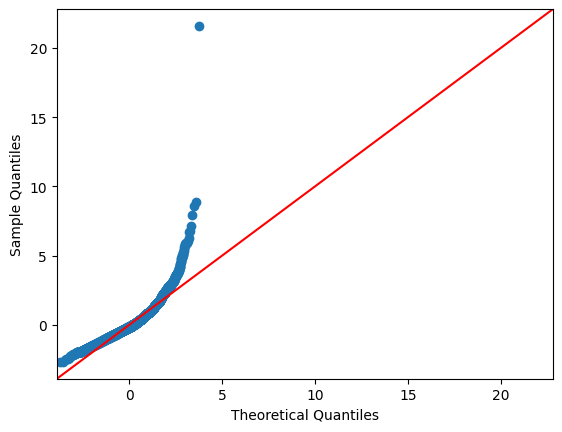

In [ ]:
from statsmodels.api import qqplot
dfgip1=df[df['state']=='TX']
qqplot(dfgip1['price_per_sqft'], line='45', fit=True)
plt.show()

Итак, у нас оба распределения НЕ НОРМАЛЬНЫЕ, что важно учитывать при выборе статистического теста. У обоих распределений тяжелый правый хвост, они скошенны


Далее для проведения теста рассмотрим выбросы в наших двух выборках.

Выбросы в Калифорнии

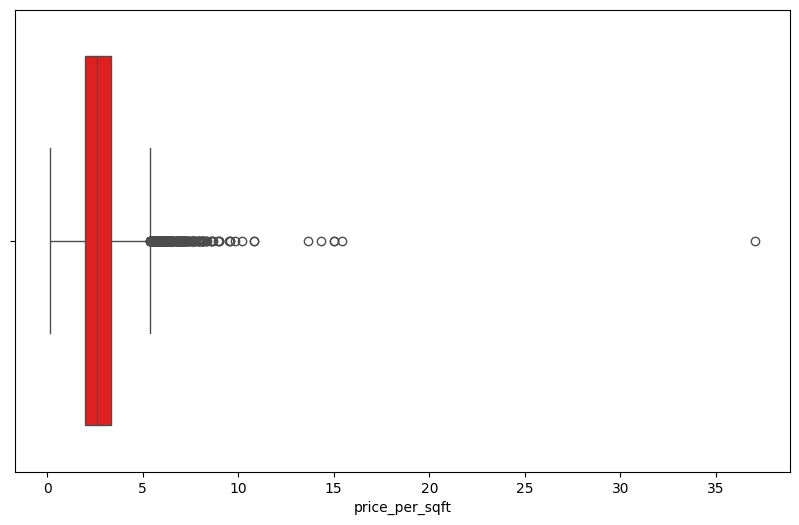

In [ ]:
import seaborn as sns
dfgip=df[df['state']=='CA']
plt.figure(figsize=(10, 6))
graph = sns.boxplot(data=dfgip, x="price_per_sqft", color='red')

Выбросы в Техасе

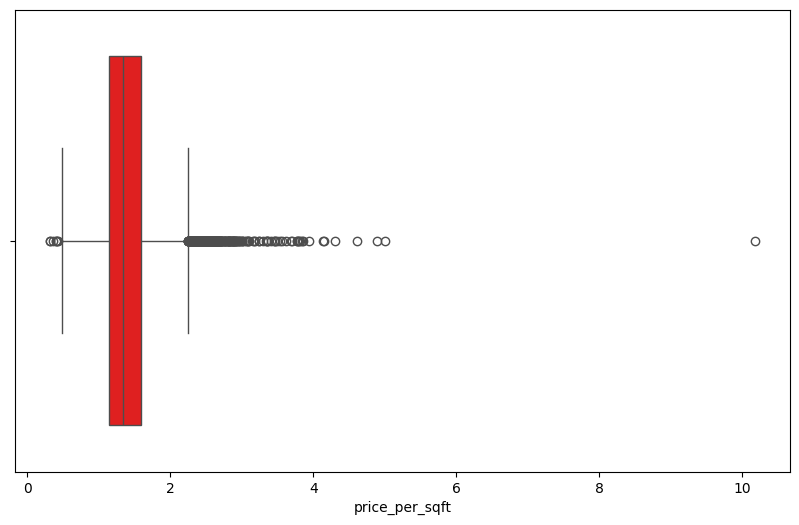

In [ ]:
import seaborn as sns
dfgip1=df[df['state']=='TX']
plt.figure(figsize=(10, 6))
graph = sns.boxplot(data=dfgip1, x="price_per_sqft", color='red')

У нас очень много выбросов, что обусловлено премиум сегментом квартир.

Обоснование выбора

Цель теста: сравнить дисперсии двух выборок

Работал на: ненормальном распределении

Робастность к большому количеству выбросов

Наши выборки НЕСВЯЗНЫЕ

Тест работает с большими выборками (10к и 11к)

Воспользуемся тестом Брауна-Форсайта.

Он устойчиы к выбросам, так как в качестве центра используется медиана, и тест проверяет равенство дисперсий на основе абслолютных отклонений от медианы. - выявляет гомогенность дисперсий. Тест использует оклонение от медианы группы.

Также важно упомянуть, что все наши данные больше 0.

In [ ]:
dfgip=df[df['state']=='CA']
dfgip1=df[df['state']=='TX']
from scipy.stats import levene

stat, p_value = levene(
    dfgip['price_per_sqft'],
    dfgip1['price_per_sqft'],
    center='median'
)

print(f"Brown-Forsythe statistic = {stat}")
print(f"p-value = {p_value}")

Brown-Forsythe statistic = 3993.002659077937
p-value = 0.0


Мы провели тест, оказалось, что p-value<0,05. Значение 0.0 обусловлено очень большой выборкой. Чтобы убедиться, что. это не ошибка мы еще раз посмотрим соотношение дисперсии цены за кв. метр между Техасом и Калифорнией

In [ ]:
var_ratio = dfgip['price_per_sqft'].var() / dfgip1['price_per_sqft'].var()
print(var_ratio)

8.710567041409627


Итак мы видим, что дисперсия в Калифорнии в 9 раз больше, чем в Техасе. Значит различие в дисперсиях практически значимое, мы можем подтвердить нашу гипотезу -> рынок Техаса более стандартизирован по цене за квадратный метр, чем рынок недвижимости в Калифорнии.

В рамках нашего анализа это может означать, что Калифорния является более сложным рынком для "новичка", поскольку в нем не так предсказуемый паттерн площадь-цена, следует гораздо глубже исследовать сторонние факторы влияния на цену за квадратный метр и учитывать их при работе риелторской компании.

Также воспользуемся тестом Flinger-Killian.

Обоснования для его использования:

Еще более устойчив к выбросам

Цель теста: Н0 - дисперсии равны
Н1 - дисперсии статистически отличаются

Тест непараметричен, не требует нормального распределение, сильнее устойчив к выбросам и к тяжелым хвостам. Применим для наших выборок.

In [ ]:
from scipy import stats

stat, p_value = stats.fligner(dfgip['price_per_sqft'], dfgip1['price_per_sqft'])
print(f"Статистика Флигнера-Килиана: {stat}")
print(f"p-value: {p_value}")

Статистика Флигнера-Килиана: 5260.915012913338
p-value: 0.0


p_value<0,05  - Дисперсия цены за фут фундаментально разная в сравниваемых группах. Гипотеза о существенном различии дисперсий подтвердилась.

Сравнительный анализ двух тестов

Оба теста отвергли Н0

Наш результат устойчивый и надежный

Тест Флингера-Килиана более надежный, поскольку он еще более робастый, чем тест Брауни-Форсайта

Итого: два независимых робстых теста подтвердили, что различие в дисперсиях цены за фут у Калифорнии и Техаса статистически значимо

Однако в то же время кожффицент вариации демонстрирует, что различие не настолько экстремально, как показывают тесты

#Гипотеза о сравнении прибрежной зоны и внутренней

Гипотеза на основе EDA:

H0: Распределения цен аренды за квадратный фут в прибрежных и внутренних штатах идентичны (Нет статистически значимого различия в распределении цен аренды между прибрежными и внутренними штатами. Цены в обеих группах сопоставимы)

H1: Распределения цен аренды за квадратный фут в прибрежных и внутренних штатах различаются. (Существует статистически значимое различие в распределении цен аренды между прибрежными и внутренними штатами - а именно предполагаем, что распределение цен в прибрежних штатах выше.)

In [ ]:
df

,id,category,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,...,state,latitude,longitude,source,time,date,price_per_sqft,price_sqft,$/sq,body_len
0,5668640009,housing/rent/apartment,"This unit is located at 507 & 509 Esplanade, R...",No amenities,1.0,1.0,No,Thumbnail,Cats,2195.0,...,CA,33.8520,-118.3759,RentLingo,1577360355,2019-12-26 11:39:15,4.049815,4.049815,4.049815,145
1,5668639818,housing/rent/apartment,"This unit is located at 146 Lochview Drive, Ne...",No amenities,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,...,VA,37.0867,-76.4941,RentLingo,1577360340,2019-12-26 11:39:00,0.833333,0.833333,0.833333,143
2,5668639686,housing/rent/apartment,This unit is located at 3101 Morningside Drive...,No amenities,2.0,3.0,No,Thumbnail,No pets,1395.0,...,NC,35.8230,-78.6438,RentLingo,1577360332,2019-12-26 11:38:52,0.845455,0.845455,0.845455,142
3,5668639659,housing/rent/apartment,"This unit is located at 209 Aegean Way, Vacavi...",No amenities,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,...,CA,38.3622,-121.9712,RentLingo,1577360330,2019-12-26 11:38:50,1.951220,1.951220,1.951220,144
4,5668639374,housing/rent/apartment,"This unit is located at 4805 Marquette NE, Alb...",No amenities,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,...,NM,35.1038,-106.6110,RentLingo,1577360308,2019-12-26 11:38:28,1.562500,1.562500,1.562500,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,No,Yes,No pets,780.0,...,TX,29.6151,-95.1998,RentDigs.com,1544185770,2018-12-07 12:29:30,1.289256,1.289256,1.289256,1012
99488,5121219696,housing/rent/apartment,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,No,Yes,"Cats,Dogs",813.0,...,FL,30.2254,-81.7579,RentDigs.com,1544185750,2018-12-07 12:29:10,0.882736,0.882736,0.882736,926
99489,5121219420,housing/rent/apartment,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,No,Yes,"Cats,Dogs",1325.0,...,CA,32.7379,-117.0914,RentDigs.com,1544185729,2018-12-07 12:28:49,2.038462,2.038462,2.038462,287
99490,5121218935,housing/rent/apartment,"Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,No,Yes,"Cats,Dogs",931.0,...,NC,35.4158,-80.8451,RentDigs.com,1544185670,2018-12-07 12:27:50,1.328103,1.328103,1.328103,893


In [ ]:
# всего 51 штат
df['state'].unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'No inf', 'ME'], dtype=object)

In [ ]:
# для начала сформируем 2 выборки - прибрежных и внутренних штатов для анализа их однородности
coastal_states = ['CA', 'OR', 'WA', 'AK', 'HI', 'ME', 'NH', 'MA', 'RI', 'CT',
                  'NY', 'NJ', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL', 'AL',
                  'MS', 'LA', 'TX']

land_states = ['AZ', 'NM', 'CO', 'WY', 'MT', 'ID', 'UT', 'NV', 'ND', 'SD',
                 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'AR', 'WI', 'IL', 'MI',
                 'IN', 'OH', 'KY', 'TN', 'WV', 'PA', 'VT', 'DC']

df_clean = df.copy()
# уберём штаты без названия
df_clean = df_clean[df_clean['state'] != 'No inf']
df_clean = df_clean.dropna(subset=['state', 'price_per_sqft'])

coastal = df_clean['state'].isin(coastal_states)
landd = df_clean['state'].isin(land_states)

coast = df_clean[coastal]['price_per_sqft']
land = df_clean[landd]['price_per_sqft']

print(f"Прибрежные штаты: {len(coast):,}")
print(f"Внутренние штаты: {len(land):,}")

# вывод: выборки несбалансированные по своему размеру

Прибрежные штаты: 69,036
Внутренние штаты: 29,945


Объявлений в прибрежных штатах - 70% , во внутренних - 30%, выборки очевидно несбалансированные, нужно будет учесть этот аспект, но сначала выведем кол-во, среднее, медиану и станд. откл. для прибрежных и внутренних штатов.

In [ ]:
countc = len(coast)
countl = len(land)
meanc = coast.mean()
meanl = land.mean()
medc = coast.median()
medl = land.median()
stdc = coast.std()
stdl = land.std()
print('coastal states:', 'count', countc, 'mean', meanc, 'median', medc, 'std', stdc, 'land states:', 'count', countl, 'mean', meanl, 'median', medl, 'std', stdl, sep = '\n')

coastal states:
count
69036
mean
1.818423262270003
median
1.5828292200969194
std
0.920081671189705
land states:
count
29945
mean
1.3699824566847525
median
1.2404227212681638
std
0.5676116418839496


Можно заметить, что в прибрежных штатах среднее превалирует над медианой сильнее чем у внутренних штатов.

- Рынок прибрежных штатов более "элитный" — больше дорогих объектов (разница среднее-медиана больше)

- Больше разнообразия — шире диапазон цен (большее std)

- Более активный рынок — больше объявлений (возможно, выше оборот)

 Также медиана в прибрежних штатах > медианы внутренних. То есть мы уже видим какой-то намёк на нашу альтернативную гипотезу, однако пока что это всего лишь наши наблюдения, а не научно обоснованный вывод.

In [ ]:
c = (coast > 12).sum()
print(c)
d = coast.max()
print(d)
b = (land > 6).sum()
b

10
37.023977433004234


np.int64(11)

Рассмотрим распределение наших данных в обеих выборках

- В выборке coast всего 10 значений > 12 (макс. = 37), поэтому можем ограничиться этой цифрой для удобства интерпретации графиков

Text(0.5, 1.0, 'Распределение данных во внутренних штатах')

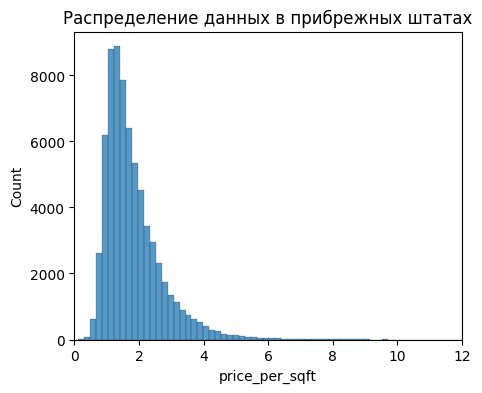

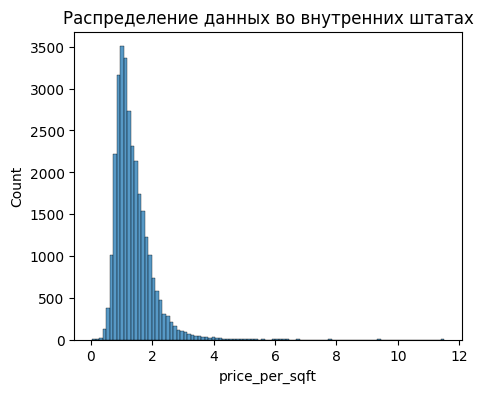

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(data=coast, bins=200);
plt.xlim(0, 12)
plt.title("Распределение данных в прибрежных штатах")

plt.figure(figsize=(5, 4))
sns.histplot(data = land, bins=100);
plt.title("Распределение данных во внутренних штатах")

Можно заметить, что:

Самые частые значения:
- Прибрежные: Пик около 1.5-1.8 $/sq.ft

- Внутренние: Пик около 1-1.2 $/sq.ft
- Разница: Прибрежные примерно немного дороже (мода выше)

Разброс данных:

- Прибрежные: Более широкое распределение (0-12+ $/sq.ft), больше значений в диапазоне 4-6

- Внутренние: Более узкое распределение (0-8 $/sq.ft)

- Вывод: Рынок прибрежных штатов более разнообразен/волатилен


Объем рынка:

- Прибрежные штаты имеют бóльший объем данных (больше объявлений)

Это может означать более активный рынок или более плотную застройку

Рассмотрим графики плотности распределения цен за кв.фут в обеих выборках

- Для будущего анализа важно заметить, что наши выборки несвязные
- Проверим гомогенность дисперсий и данные на нормальное распределение, что может быть важно для применимости каких-то статистических тестов впоследствии

ПОДБОР ПРАВИЛЬНОГО СТАТИСТИЧЕСКОГО ТЕСТА

FlignerResult(statistic=np.float64(3457.5584794370707), pvalue=np.float64(0.0))


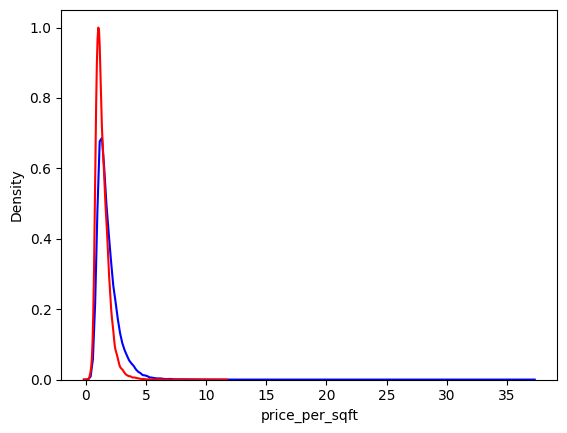

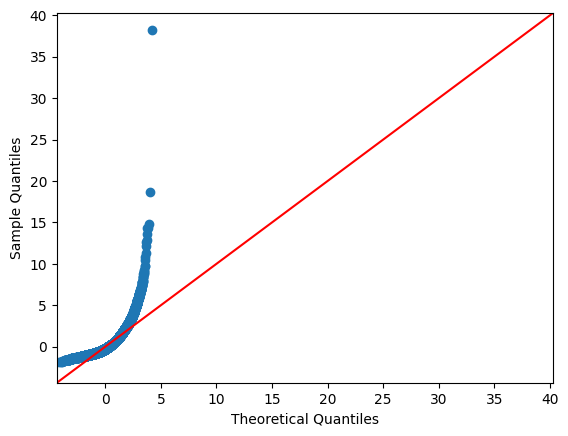

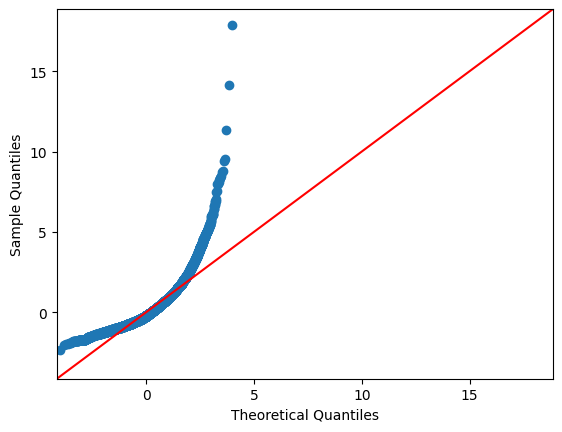

In [ ]:
from statsmodels.api import qqplot
sns.kdeplot(coast, label='Прибрежные', color='blue')
sns.kdeplot(land, label='Внутренние', color='red')

from scipy.stats import fligner
print(fligner(coast, land))

fig = qqplot(coast, stats.norm, line='45', fit=True)
fig = qqplot(land, stats.norm, line='45', fit=True)

1. Тест Флигера — Килена — статистический инструмент для оценки однородности дисперсий в разных группах, особенно при наличии данных, не относящихся к нормальному распределению.
Основная цель теста — определить, равны ли дисперсии разных групп. Тест работает на основе нулевой гипотезы, что все дисперсии групп равны, и вычисляет тестовый показатель на основе рангов данных, что делает его менее чувствительным к выбросам по сравнению с другими тестами (большие размеры выборок также не влияют на результаты). С помощью этого теста мы выяснили, что дисперсии абсолютно не гомогенны, а наоборот очень сильно отличаются у обеих выборок (так как p-value < 0.05)
2. Обе выборки не имеют нормального распределения (делаем такой вывод проинтерпретировав наши Q-Q plot). - следовательно мы не можем использовать тесты, предназначенные для нормально распределённых данных
3. Форма распределения:

В обеих выборках имеется правосторонний перекос(это типично для цен на недвижимость (логарифмическое распределение)), следовательно мы можем использовать 'Mann-Whitney U-тест' в таком случае (также важно что у нас выборки несвязные).



Что проверяет тест:

- Есть ли систематическое превышение значений одной группы над другой

- Сдвинуты ли распределения относительно друг друга

- Имеет ли одна группа тенденцию к большим значениям


Почему именно тест Манна-Уитни?
Обоснование выбора:

Непараметрический: Не требует предположения о нормальности распределения

Робастный: Устойчив к выбросам (важно для цен на недвижимость)

Для медиан: Эффективно обнаруживает различия в медианах

Для независимых выборок: Группы не связаны между собой

Порядковая шкала: Работает с рангами, а не с исходными значениями

Используется: когда данных мало или ненормальное распределение

In [ ]:
from scipy.stats import mannwhitneyu
def sample_size_reduction(x, y, n=3000):
    pv = []
    for i in range(n):
        sample_x = np.random.choice(x, size = len(y))
        sample_y = y
        stat, p_val = stats.mannwhitneyu(sample_x, sample_y,  alternative='greater')
        pv.append(p_val)
    return np.mean(pv)

pv_new = sample_size_reduction(coast, land)
print(f"Односторонний p-value: {pv_new}")
# print(stat)

Односторонний p-value: 0.0


U-критерий Манна-Уитни подходит для сравнения несбалансированных по размеру выборок.
Объём групп не должен быть строго одинаковым, но не должен сильно различаться, поэтому мы попытались устранить эту проблему.
Статья , давшая идею для решения проблемы дисбаланса - https://itstd-journal.ru/wp-content/uploads/2024/03/METHODS-FOR-SOLVING-THE-CLASS-IMBALANCE-PROBLEM-IN-.pdf

Из данного ресурса, наиболее подходящим показался метод уменьшения выборки (с преобладающим кол-вом наблюдений). Однако важно, что у этого метода имеется важное ограничени в том, что он может привести к потери важной инф-ции, из БОльшей выборки, именно поэтому применим этот метод, выбрав рандомно 3000 раз такое же число наблюдений из контрольной группы, сколько и в тестовой (предварительно проанализировав данные). И при каждой генерации проводим тест Манна-Уитни - получаем искомое p-value - кладём в общий список со всеми собранными p-value - в конце берём среднее значение и так получаем наш результат. Чем больше повторений будет в этой функции, тем точнее должно получаться итоговое p-value, в данной задаче решено было установить значение 3000

Гипотеза статистически подтверждена с максимальной уверенностью.

- (p - value < 0.05), то есть мы получили статистически значимый результат и отклоняем нашу H0, принимаем H1 - цены аренды в прибрежных штатах выше, чем во внутренних

In [ ]:
n1, n2 = len(coast), len(land)
U = min(stat, n1*n2 - stat)
z = (U - n1*n2/2) / np.sqrt(n1*n2*(n1+n2+1)/12)
r = z / np.sqrt(n1 + n2)

print(f"   Стандартизованный r = {r:.3f}")

   Стандартизованный r = -0.796


Источник, в котором подробнее обозревается понятие размера эффекта : https://en.wikipedia.org/wiki/Effect_size

Потробнее о нашем измерении размера эффекта:
Стандартизованный коэффициент эффекта (effect size) r — стандартизированная мера эффекта для U-теста Манна-Уитни. Она может быть полезна для сравнения результатов различных исследований или наборов данных.

По значению r можно судить о силе эффекта:

r менее 0,3 — небольшой эффект

r между 0,3 и 0,5 — средний эффект

r больше 0,5 — большой эффект


Что означает r = -0.796:
Знак минус: первая группа (coast) имеет значительно более высокие значения систематически

Абсолютное значение 0.796: эффект очень заметный

Далее проанализируем разницу между нашими медианами, подберём максимально точный интервал. Найдём найдём Эфронов доверительный интервал, в котором находится искомая разница с точностью 95%.

In [ ]:
def bootstrap_median_diff(x, y, n=3000):
    diffs = []
    for i in range(n):
        # Bootstrap из обеих выборок
        sample_x = np.random.choice(x, size=len(x), replace=True)
        sample_y = np.random.choice(y, size=len(y), replace=True)
        diffs.append(np.median(sample_x) - np.median(sample_y))

    # Доверительный интервал 95%
    lower = np.percentile(diffs, 2.5)
    upper = np.percentile(diffs, 97.5)
    return lower, upper

ci_lower, ci_upper = bootstrap_median_diff(coast, land)
print(f"интервал разницы медиан: [{ci_lower:.3f}, {ci_upper:.3f}]")

интервал разницы медиан: [0.334, 0.353]


Найденный Эфронов доверительный интервал составил: 0.334 - 0.352, так как интервал не включает 0, значит это значимый статистический результат и мы можем доверять полученному диапазону.

Узкий интервал (ширина 0.019) указывает на высокую точность оценки (из-за большого объёма данных)


На сайте https://habr.com/ru/articles/829336/ мы нашли информацию, Эфронов доверительный интервал дает смещенную оценку в случаях распределений с тяжелыми хвостами (как и в нашем случае), однако при вычислении дов. инт. Холла (более корректную) мы получили результат: 333 - 352, поэтому можем использовать найденный Эфронов интервал, так как он итак получился достаточно точным.

ВЫВОД :
- Теперь с уверенностью 95% можно утверждать, что арендная плата в прибрежных штатах США статистически значимо превышает плату во внутренних штатах на 0.334-0.352 доллара за квадратный фут, что составляет существенную экономическую разницу для арендаторов и инвесторов.
- Разница в 0.34$ за кв. фут- это не просто статистика, это дополнительный доход, который в среднем мы будем получать дополнительно за кв.фут, продвигая объекты в прибрежных зонах, вместо внутренних



РАЗДЕЛ С ДРУГИМ СТАТИСТИЧЕСКИМ ТЕСТОМ

Переформулируем немного нашу гипотезу:

H0 - Средняя цена за квадратный фут недвижимости в прибрежных штатах и средняя цена во внутренних штатах не отличаются

H1 - Средняя цена за квадратный фут недвижимости в прибрежных штатах превышает среднюю цену во внутренних штатах.


Text(0.5, 1.0, 'Распределение данных во внутренних штатах')

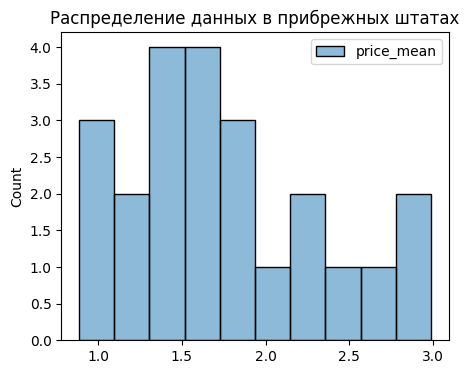

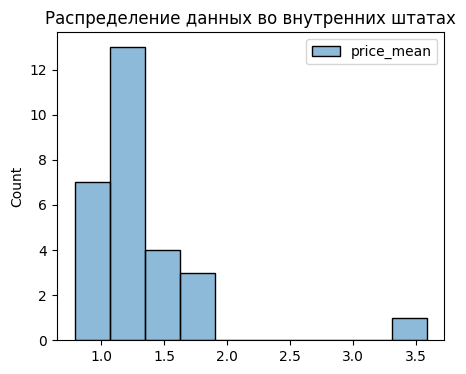

In [ ]:
state_means = df_clean.groupby('state')['price_per_sqft'].agg(['mean']).reset_index()
state_means.columns = ['state', 'price_mean']

coast_means = state_means[state_means['state'].isin(coastal_states)]
land_means = state_means[state_means['state'].isin(land_states)]

plt.figure(figsize=(5, 4))
sns.histplot(data=coast_means, bins=10);
# plt.xlim(0, 12)
plt.title("Распределение данных в прибрежных штатах")

plt.figure(figsize=(5, 4))
sns.histplot(data = land_means, bins=10);
# plt.xlim(0, 200)
plt.title("Распределение данных во внутренних штатах")

/tmp/ipython-input-665098811.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-665098811.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LeveneResult(statistic=np.float64(1.689291759832421), pvalue=np.float64(0.1997757930769295))
ShapiroResult(statistic=np.float64(0.9805309381420475), pvalue=np.float64(0.9150059322542647))
ShapiroResult(statistic=np.float64(0.8808690993656288), pvalue=np.float64(0.004196781071669509))


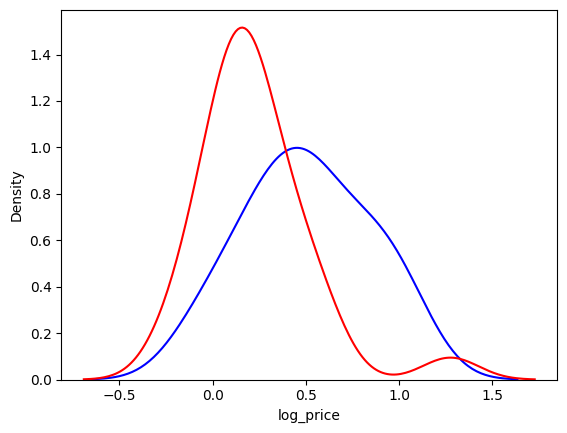

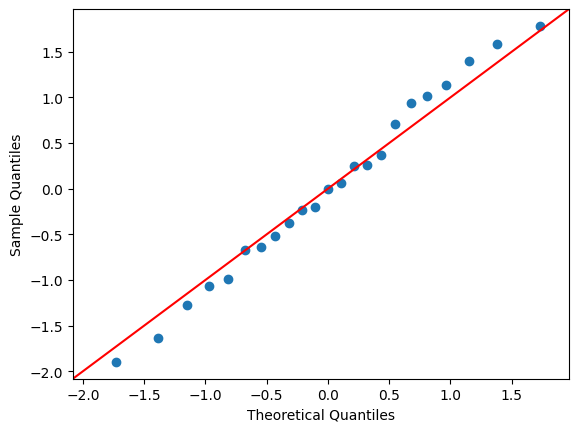

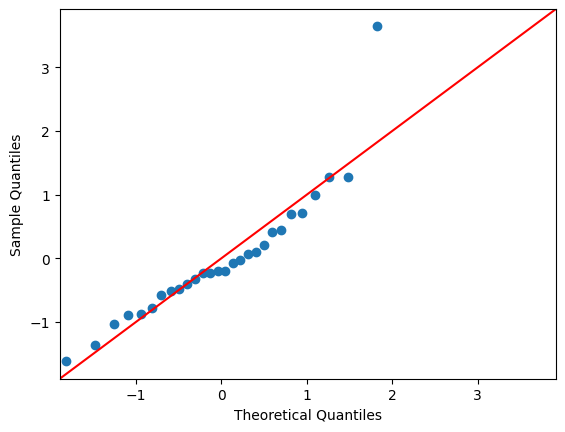

In [ ]:
coast_means['log_price'] = np.log(coast_means['price_mean'])
land_means['log_price'] = np.log(land_means['price_mean'])

sns.kdeplot(coast_means['log_price'], label='Прибрежные', color='blue')
sns.kdeplot(land_means['log_price'], label='Внутренние', color='red')

# проверим на гомогенность дисперсий
print(levene(coast_means['log_price'], land_means['log_price']))

# проверим на нормальночть распределения
fig = qqplot(coast_means['log_price'], stats.norm, line='45', fit=True)
fig = qqplot(land_means['log_price'], stats.norm, line='45', fit=True)

from scipy.stats import shapiro
print(shapiro(coast_means['log_price']), shapiro(land_means['log_price']), sep = '\n')

In [ ]:
df[df['state'] == 'DC']

,id,category,body,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,...,state,latitude,longitude,source,time,date,price_per_sqft,price_sqft,$/sq,body_len
12,5668637809,housing/rent/apartment,This unit is located at 2537 North Capitol Str...,No amenities,2.0,2.0,No,Thumbnail,No pets,2395.0,...,DC,38.9118,-77.0132,RentLingo,1577360182,2019-12-26 11:36:22,2.672991,2.672991,2.672991,151
83,5668636211,housing/rent/apartment,"This unit is located at 3707 Woodley Road, NW,...",No amenities,1.0,2.0,No,Thumbnail,"Cats,Dogs",2395.0,...,DC,38.9118,-77.0132,RentLingo,1577360093,2019-12-26 11:34:53,2.661111,2.661111,2.661111,144
406,5668618772,housing/rent/apartment,This unit is located at 2000 Connecticut Avenu...,"Cable or Satellite,Dishwasher,Elevator,Garbage...",1.0,1.0,No,Thumbnail,No pets,2075.0,...,DC,38.9118,-77.0132,RentLingo,1577358880,2019-12-26 11:14:40,3.672566,3.672566,3.672566,320
429,5668612083,housing/rent/apartment,"This unit is located at 3146 16th Street Nw, W...","Cable or Satellite,Clubhouse,Dishwasher,Elevat...",1.0,1.0,No,Thumbnail,"Cats,Dogs",2749.0,...,DC,38.9118,-77.0132,RentLingo,1577358463,2019-12-26 11:07:43,5.296724,5.296724,5.296724,306
539,5668636216,housing/rent/apartment,"This unit is located at 4105 Wisconsin Avenue,...",No amenities,1.0,0.0,No,Thumbnail,No pets,1345.0,...,DC,38.9118,-77.0132,RentLingo,1577360093,2019-12-26 11:34:53,2.241667,2.241667,2.241667,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51729,5289942105,housing/rent/apartment,xxxxxxxxxx.xxx Listing ID xxx-xxx-xxxx. Beauti...,"Cable or Satellite,Dishwasher,Fireplace,Intern...",2.0,2.0,No,Thumbnail,No pets,3650.0,...,DC,38.9073,-77.0365,RealRentals,1555620280,2019-04-18 20:44:40,3.103741,3.103741,3.103741,323
64799,5198604051,housing/rent/apartment,We believe elevating where you live is about b...,"Gym,Parking,Patio/Deck",1.0,0.0,No,Thumbnail,No pets,1679.0,...,DC,38.8978,-77.0413,RentDigs.com,1550863022,2019-02-22 19:17:02,3.358000,3.358000,3.358000,990
83396,5161831356,housing/rent/apartment,"Hello, I would like to rent out a completely f...",Washer Dryer,0.,1.0,No,Yes,No pets,2300.0,...,DC,38.9118,-77.0132,SpreadMyAd,1547857664,2019-01-19 00:27:44,3.194444,3.194444,3.194444,250
83448,5151383467,housing/rent/apartment,xxxxxxxxxx.xxx Listing ID xxx-xxx-xxxx. Cozy 2...,"AC,Dishwasher,Refrigerator",1.0,2.0,No,Thumbnail,"Cats,Dogs",1500.0,...,DC,38.9614,-77.0136,RealRentals,1546893754,2019-01-07 20:42:34,1.875000,1.875000,1.875000,303


Применимость t - test:
1. Гомогенность дисперсий наших выборок подтверждена с помощью теста Левена, мы получили p-value = 0.1997757930769295 > 0.05, значит не можем отклонить нашу нулевую гипотезу и продолжаем пока считать, что дисперсии равны


2. С помощью Q-Q plot и теста Шапиро-Уилка выяснили, что распределение логарифмированнных средних значений цен а кв. фут по штатам в прибрежной зоне - нормальное (получили p-value > 0.05) - оставляем нулевую гипотезу о том, что распределение нормально

3. Что касается внутренней зоны - мы имеем умеренное отклонение от нормальности. Можно заметить показатель статистики теста = 0.881 примерно - это достаточно высокое значение (статистика говорит о степени соответствия нормального распределения) - то есть наши данные имеют приемлемую нормальность.
Хотя тест Шапиро-Уилка показал статистически значимое отклонение от нормальности (p = 0.004), что, вероятно, связано с включением округа Колумбия (DC) — аномального наблюдения, — t-тест является достаточно устойчивым к умеренным нарушениям нормальности при размере выборки N = 28 (что близко к 30) - По ЦПТ.

In [ ]:
print(stats.ttest_ind(
    coast_means['log_price'],
    land_means['log_price'],
    equal_var=True, alternative = 'greater'
))

TtestResult(statistic=np.float64(3.1838977705413583), pvalue=np.float64(0.001262841279409706), df=np.float64(49.0))


Сделав односторонний t - test для несвязных выборок получаем p-value < 0.05, то есть статистически значимый результат. Значит мы можем отклонить нашу нулевую гипотезу и принять альтернативную - средняя цена за квадратный фут недвижимости в прибрежных штатах превышает среднюю цену во внутренних штатах.

Связь двух тестов:

Для комплексной проверки гипотезы о более высоких ценах в прибрежных штатах использованы два взаимодополняющих подхода:
1) непараметрический тест Манна-Уитни, проверяющий систематическое превышение цен;
2) параметрический t-тест, проверяющий различие средних значений.

Общий вывод:

Прибрежные штаты однозначно дороже внутренних, причём это проявляется как на уровне средних значений, так и на уровне общего распределения цен.

* Не просто "в среднем" дороже (t-test), а систематически и стабильно дороже (Mann-Whitney)

* Разница не случайна — подтверждена двумя независимыми методами

* Эффект устойчив — проявляется при разных способах измерения

# Гипотеза про площадь и цену за квадратный фут

Во время анализа в разделе "Новый признак - удаленность от центра" была замечена связь между площадью жилья и ценой за квадратный фут. На графике представлены данные из всего датасета и как мы видим, из-за выбросов, ничего непонятно, поэтому логарифмируем признаки.

Text(0.5, 1.0, 'Зависимость цены за кв.фут от площади')

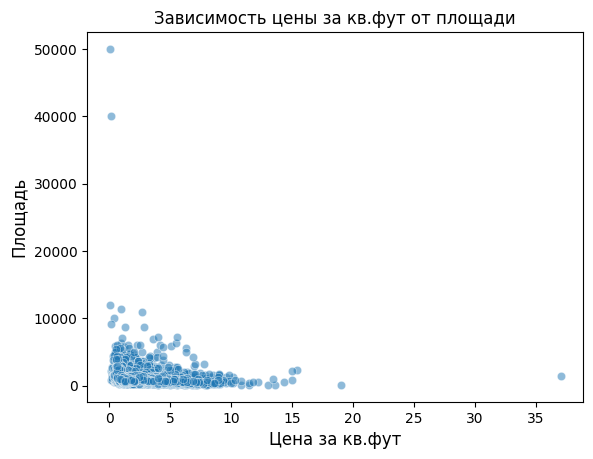

In [ ]:
plt.scatter(vf['$/sq'], vf['square_feet'], alpha = 0.5, edgecolors = 'w', linewidth = 0.5)
plt.xlabel('Цена за кв.фут', fontsize=12)
plt.ylabel('Площадь', fontsize=12)
plt.title('Зависимость цены за кв.фут от площади')

Text(0.5, 1.0, 'Зависимость цены за кв.фут от площади (лог.)')

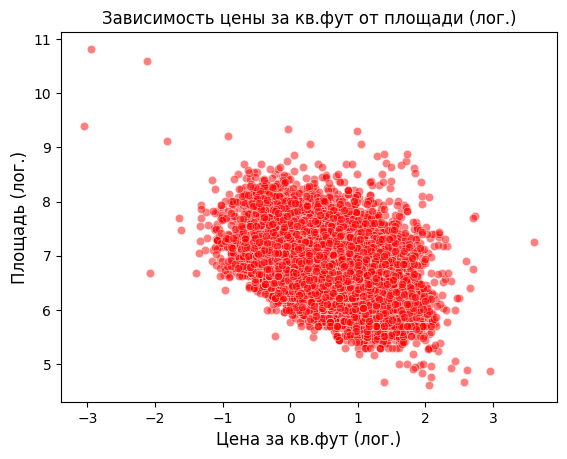

In [ ]:
vf = df.copy()
vf['log_sq'] = vf['square_feet'].apply(lambda x: np.log(x)) #логарифмируем признаки, чтобы разброс был меньше
vf['log_$/sq'] = vf['$/sq'].apply(lambda x: np.log(x))
plt.scatter(vf['log_$/sq'], vf['log_sq'], alpha = 0.5, edgecolors = 'w', linewidth = 0.5, color = 'red')
plt.xlabel('Цена за кв.фут (лог.)', fontsize=12)
plt.ylabel('Площадь (лог.)', fontsize=12)
plt.title('Зависимость цены за кв.фут от площади (лог.)')

Text(0.5, 1.0, 'Цена за кв.фут (лог.)')

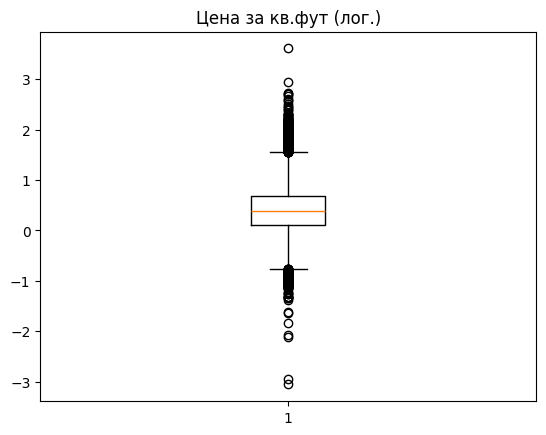

In [ ]:
plt.boxplot(vf['log_$/sq'])
plt.title("Цена за кв.фут (лог.)")

Text(0.5, 1.0, 'Площадь (лог.)')

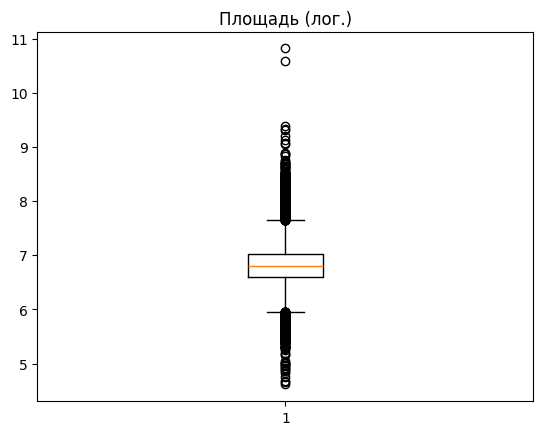

In [ ]:
plt.boxplot(vf['log_sq'])
plt.title("Площадь (лог.)")

H0: Уменьшение цены за фут не связано с увеличением площади жилья

H1: Уменьшения цены за фут связано с увеличением площади жилья

Для проверки гипотезы используем тест ранговой корреляции Спирмена (https://www.geeksforgeeks.org/data-science/spearmans-rank-correlation/). О принципе работы теста кратко: данные ранжируются и им присваиваются ранги, считается коэффициент корреляции Спирмена по формуле. Потом этот коэффициент преобразуется в p-value. "Почему ранговая корреляция?" - https://blogs.sas.com/content/iml/2023/04/03/why-rank-correlation.html

Тест Кендалла-тау основан на подсчете "согласованных" пар, тоже работает с рангами, но более неявно, чем Спирмен

In [ ]:
from scipy.stats import spearmanr
data = vf[["square_feet", "$/sq"]].dropna() #чистим от нанов, чтобы тест не сломался
x = data["square_feet"].to_numpy() #тест принимает на вход массивы, поэтому надо преобразовать pd.Series в np.array
y = data["$/sq"].to_numpy() #логарифмирование не влияет на рез-ты теста из-за механики теста Спирмена
corr, p_value = spearmanr(x, y)
print("Spearman's correlation coefficient:", corr)
print("p-value:", p_value)

Spearman's correlation coefficient: -0.34023935331789473
p-value: 0.0


In [ ]:
from scipy.stats import kendalltau
corr, p_value = kendalltau(x, y)
print('Kendall Rank correlation: %.5f' % corr)
print("p-value:", p_value)

Kendall Rank correlation: -0.23345
p-value: 0.0


Ура, отвергаем нулевую гипотезу об отсутствии связи между признаками цены за квадратный фут и площади.
Как можно было увидеть на графике и как видно из результатов теста, есть корреляция. То есть можно говорить о том, что есть монотонная зависимость между признаками, характер - обратно пропорциональный.